# Funds Explorer Crawler

*Referência:* https://dmenezesgabriel.github.io/python/selecao-fundos-imobiliarios-python/

## Objetivo
Este notebook tem por objetivo facilitar a seleção de fundos de investimentos imobiliários(FIIs), para constiutição de carteira previdênciaria com bons distribuidores de proventos, cuja distribuição seja sustentável a longo prazo.

## Método
- Extração de dados do site [Funds Explorer](https://www.fundsexplorer.com.br/)
- Tratamento dos dados
- Filtro baseado em requisitos minimos de aceitação
- É necessária análise qualitativa dos papéis resultantes

## Referências para análise quantitativa/qualitativa
- [Funds Explorer](https://www.fundsexplorer.com.br/)
- [Youtube](https://www.youtube.com/)
- [Status Invest](https://statusinvest.com.br/)
- [FIIs](https://fiis.com.br/)
- [Clube Fii](https://www.clubefii.com.br/)



In [118]:
from lxml import html
import time
import datetime
import logging
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz

%matplotlib inline


## Extração dos dados (Data Extraction)

In [69]:
def now():
    """
    Current timestamp at time zone utc
    :returns: timestamp
    """
    return pytz.UTC.localize(datetime.datetime.utcnow())


def now_br():
    """
    Current timestamp at time zone América São Paulo
    :returns: timestamp
    """
    return now().astimezone(pytz.timezone("America/Sao_Paulo"))

In [70]:
# Logging basic configuration
logging.basicConfig(level=logging.INFO)
_logger = logging.getLogger()

In [71]:
# Updated at
str(now_br())

'2021-06-09 20:22:50.732295-03:00'

In [72]:
url = 'https://www.fundsexplorer.com.br/ranking'
headers = {
    'User-Agent': 
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36'
        ' (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
}

# Collecting Data
response = requests.get(url, headers)
_logger.info("%s url request's status: %s", url, response.status_code)
# List object of Data Frames
list_obj = pd.read_html(response.text, attrs={'id': 'table-ranking'})
df = list_obj[0]

INFO:root:https://www.fundsexplorer.com.br/ranking url request's status: 200


In [73]:
df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,95",5543.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 64.832.865,32","R$ 6,89",43.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 439.665.897,40","R$ 11,45",128.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 7,00",1329.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 25.472.636,57","R$ 14,21",49.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 1.197,00",107.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 229.423.903,28","R$ 2.063,59",58.0,NaN,NaN,NaN,NaN,"68,15%",NaN,1
4,DOMC11,Lajes Corporativas,"R$ 439,00",42.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 264.351.778,61","R$ 108,17",406.0,NaN,NaN,NaN,NaN,"23,44%",NaN,1


In [74]:
len(df)

239

In [75]:
df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                 object
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

## Limpeza de dados (Data Cleaning)

### Cabeçalhos
- Remoção de espaços
- Remoção de acentos e pontuação
- Transformação dos caracteres para minúsculo

In [76]:
# Cleanning data headers
df.columns = df.columns.str.replace('\s+', '_', regex=True)
df.columns = df.columns.str.replace(r'[^\w\s]+', '_', regex=True)
df.columns = df.columns.str.lower()
df.columns = df.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df.columns

Index(['codigodo_fundo', 'setor', 'preco_atual', 'liquidez_diaria',
       'dividendo', 'dividendyield', 'dy__3m_acumulado', 'dy__6m_acumulado',
       'dy__12m_acumulado', 'dy__3m_media', 'dy__6m_media', 'dy__12m_media',
       'dy_ano', 'variacao_preco', 'rentab_periodo', 'rentab_acumulada',
       'patrimonioliq_', 'vpa', 'p_vpa', 'dypatrimonial',
       'variacaopatrimonial', 'rentab__patr_no_periodo',
       'rentab__patr_acumulada', 'vacanciafisica', 'vacanciafinanceira',
       'quantidadeativos'],
      dtype='object')

### Valores
- Conversão de moeda em formatode texto para número
- Remoção de espaços
- Remoção de acentos e pontuação
- Transformação dos caracteres para minúsculo


In [77]:
df.head()

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,patrimonioliq_,vpa,p_vpa,dypatrimonial,variacaopatrimonial,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos
0,FIVN11,Shoppings,"R$ 2,95",5543.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 64.832.865,32","R$ 6,89",43.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 439.665.897,40","R$ 11,45",128.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 7,00",1329.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 25.472.636,57","R$ 14,21",49.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 1.197,00",107.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 229.423.903,28","R$ 2.063,59",58.0,NaN,NaN,NaN,NaN,"68,15%",NaN,1
4,DOMC11,Lajes Corporativas,"R$ 439,00",42.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 264.351.778,61","R$ 108,17",406.0,NaN,NaN,NaN,NaN,"23,44%",NaN,1


In [78]:
def columns_which_contains(df, value):
    """
    Serch for DataFrame column's values which contains a specific value
    :value: any characters, phrases, symbols
    :returns: list of DataFrame column's names
    """
    return [df[column].name for column in df if df[column].astype(str).str.contains(value).any()]

In [79]:
# Convert string BR currency to float
currency_columns = columns_which_contains(df, '\$')
_logger.info("Currency Columns: %s", currency_columns)
for column_name in currency_columns:
    df[column_name] = df[column_name].str.replace('.', '', regex=False)
    df[column_name] = df[column_name].str.replace(',', '.', regex=False)
    df[column_name] = df[column_name].str.replace('[R\$ ,]', '', regex=True).astype(float)

INFO:root:Currency Columns: ['preco_atual', 'dividendo', 'patrimonioliq_', 'vpa']


In [80]:
# Convert string % to float
percentual_columns = columns_which_contains(df, '\%')
_logger.info("Percentual Columns: %s", percentual_columns)
for column_name in percentual_columns:
    df[column_name] = df[column_name].str.replace('.', '', regex=False)
    df[column_name] = df[column_name].str.replace(',', '.')
    df[column_name] = df[column_name].str.replace('[%,]', '', regex=True).astype(float)
    df[column_name] = df[column_name]/100

INFO:root:Percentual Columns: ['dividendyield', 'dy__3m_acumulado', 'dy__6m_acumulado', 'dy__12m_acumulado', 'dy__3m_media', 'dy__6m_media', 'dy__12m_media', 'dy_ano', 'variacao_preco', 'rentab_periodo', 'rentab_acumulada', 'dypatrimonial', 'variacaopatrimonial', 'rentab__patr_no_periodo', 'rentab__patr_acumulada', 'vacanciafisica', 'vacanciafinanceira']


In [81]:
df.head()

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,patrimonioliq_,vpa,p_vpa,dypatrimonial,variacaopatrimonial,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos
0,FIVN11,Shoppings,2.95,5543.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.483287e+07,6.89,43.0,NaN,NaN,NaN,NaN,0.5600,NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.396659e+08,11.45,128.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,7.00,1329.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.547264e+07,14.21,49.0,NaN,NaN,NaN,NaN,0.0000,1.0,1
3,ALMI11,Lajes Corporativas,1197.00,107.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.294239e+08,2063.59,58.0,NaN,NaN,NaN,NaN,0.6815,NaN,1
4,DOMC11,Lajes Corporativas,439.00,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.643518e+08,108.17,406.0,NaN,NaN,NaN,NaN,0.2344,NaN,1


In [82]:
df['setor'] = df['setor'].str.replace('\s+', '_', regex=True)
df['setor'] = df['setor'].str.replace(r'[^\w\s]+', '_', regex=True)
df['setor'] = df['setor'].str.lower()
df['setor'] = df['setor'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

## Análise Exploratória dos dados (Exploratory Data Analysis)


In [83]:
df.setor.unique()

array(['shoppings', 'titulos_e_val__mob_', 'lajes_corporativas',
       'hibrido', 'outros', 'hotel', 'residencial', 'hospital',
       'logistica'], dtype=object)

In [84]:
df.codigodo_fundo.nunique()

239

In [85]:
# Convert p/vpa to the correct base
df['p_vpa'] = df['p_vpa']/100
# Checking if is it correct
df[df['codigodo_fundo'] == 'VRTA11']

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,patrimonioliq_,vpa,p_vpa,dypatrimonial,variacaopatrimonial,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos
122,VRTA11,titulos_e_val__mob_,112.11,28399.0,1.04,0.0093,0.0249,0.0482,0.0866,0.0083,...,1.010653e+09,101.07,1.11,NaN,NaN,NaN,NaN,NaN,NaN,0


In [86]:
df.describe()

,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,dy__6m_media,dy__12m_media,...,patrimonioliq_,vpa,p_vpa,dypatrimonial,variacaopatrimonial,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos
count,232.000000,232.000000,239.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.00000,225.000000,...,2.390000e+02,239.000000,232.00,34.000000,34.000000,34.000000,34.000000,116.000000,25.000000,239.000000
mean,515.481940,18339.603448,1.429414,0.009124,0.020196,0.034491,0.054098,0.006733,0.00575,0.004508,...,5.129775e+08,651.322636,inf,0.006144,0.001206,0.007350,0.017274,0.155673,0.126088,3.347280
std,5593.329186,56370.585108,4.700234,0.030429,0.032502,0.038625,0.055669,0.010833,0.00644,0.004640,...,7.095276e+08,6172.347388,NaN,0.002631,0.004042,0.004334,0.012825,0.228105,0.232145,7.985853
min,0.760000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,-5.941591e+06,-7.830000,-1.59,0.000800,-0.003700,-0.000500,-0.014600,0.000000,0.000000,0.000000
25%,83.462500,361.250000,0.400000,0.004500,0.010600,0.016200,0.000000,0.003500,0.00270,0.000000,...,1.025887e+08,93.705000,0.84,0.005025,-0.001300,0.005325,0.010800,0.000000,0.000000,0.000000
50%,98.575000,3413.500000,0.630000,0.006300,0.017600,0.033200,0.058300,0.005900,0.00550,0.004900,...,2.603974e+08,100.080000,0.97,0.006100,0.000250,0.006550,0.017550,0.057000,0.036000,1.000000
75%,112.027500,15271.250000,0.940000,0.007900,0.022400,0.044700,0.079300,0.007500,0.00740,0.006600,...,5.898824e+08,109.680000,1.03,0.007150,0.001800,0.008625,0.025975,0.213250,0.123000,3.000000
max,85227.760000,636366.000000,52.680000,0.363200,0.379900,0.409600,0.452200,0.126600,0.06830,0.037700,...,4.852707e+09,93717.970000,inf,0.011900,0.015300,0.021300,0.045000,1.000000,1.000000,72.000000


In [87]:
df.setor.unique()

array(['shoppings', 'titulos_e_val__mob_', 'lajes_corporativas',
       'hibrido', 'outros', 'hotel', 'residencial', 'hospital',
       'logistica'], dtype=object)

In [88]:
# Filtering relevant sectors
df = df[df['setor'].isin(['shoppings', 'titulos_e_val__mob_', 'lajes_corporativas', 'hibrido', 'logistica'])].copy()

In [89]:
df.setor.unique()

array(['shoppings', 'titulos_e_val__mob_', 'lajes_corporativas',
       'hibrido', 'logistica'], dtype=object)

In [90]:
df.head()

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,patrimonioliq_,vpa,p_vpa,dypatrimonial,variacaopatrimonial,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos
0,FIVN11,shoppings,2.95,5543.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.483287e+07,6.89,0.43,NaN,NaN,NaN,NaN,0.5600,NaN,1
1,BZLI11,titulos_e_val__mob_,14.70,44041.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.396659e+08,11.45,1.28,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,lajes_corporativas,7.00,1329.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.547264e+07,14.21,0.49,NaN,NaN,NaN,NaN,0.0000,1.0,1
3,ALMI11,lajes_corporativas,1197.00,107.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.294239e+08,2063.59,0.58,NaN,NaN,NaN,NaN,0.6815,NaN,1
4,DOMC11,lajes_corporativas,439.00,42.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.643518e+08,108.17,4.06,NaN,NaN,NaN,NaN,0.2344,NaN,1


### Definindo requisitos para filtro
- 90% < P/VPA < 110%
- Quantidade de ativos > 5 para os setores de shoppings, lajes corporativas e logistica
- Vacância física < 10%
- Líquidez diária acima de 20k
- Dividend Yield acumulado acima de 5%

In [91]:
# Price vs net worth
df['acceptable_pricing'] = np.where((df['p_vpa'] > 0.9) & (df['p_vpa'] < 1.1) , True, False)

# Asset diversification
diverssified_assets_conditions = [
    # 1st Condition
    (df['setor'].isin(['shoppings', 'lajes_corporativas', 'logistica'])) &
    (df['quantidadeativos'] > 5),
    # 2st Condition
    (df['setor'].isin(['shoppings', 'lajes_corporativas', 'logistica'])) &
    (df['quantidadeativos'] < 5),
    # 3rd Condition
    (~df['setor'].isin(['shoppings', 'lajes_corporativas', 'logistica']))
]
diverssified_assets_choices = [True, False, True]
df['diverssified_assets'] = np.select(diverssified_assets_conditions, diverssified_assets_choices, default=None)

# Vacancy
df['razonably_occupied'] = np.where((df['vacanciafisica'] < 0.1) | (df['vacanciafisica'].isnull()) | (df['vacanciafisica'].isnull()) , True, False)

# Liquidity
df['is_liquid'] = np.where(df['liquidez_diaria'] > 20000, True, False)

# dividend yield
df['good_earnings'] = np.where(df['dy__12m_acumulado'] > 0.05, True, False)

In [92]:
papper_acceptable_conditions = (
    df.acceptable_pricing &
    df.diverssified_assets &
    df.razonably_occupied &
    df.is_liquid &
    df.good_earnings
)
df_results = df.loc[papper_acceptable_conditions].sort_values(by=['dy__12m_acumulado', 'liquidez_diaria'], ascending=False)

### Resultado
*Os papéis abaixo não são recomendação de compra, mas sim estudo*.

In [93]:
df_results

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,rentab__patr_no_periodo,rentab__patr_acumulada,vacanciafisica,vacanciafinanceira,quantidadeativos,acceptable_pricing,diverssified_assets,razonably_occupied,is_liquid,good_earnings
234,RECR11,titulos_e_val__mob_,103.69,68180.0,1.20,0.0116,0.0308,0.0669,0.1278,0.0103,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
41,CVBI11,titulos_e_val__mob_,104.81,47145.0,1.00,0.0094,0.0287,0.0732,0.1171,0.0096,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
162,BCRI11,titulos_e_val__mob_,112.00,37315.0,1.59,0.0138,0.0365,0.0627,0.1116,0.0122,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
37,CPTS11,titulos_e_val__mob_,100.79,90795.0,1.05,0.0104,0.0307,0.0615,0.1064,0.0102,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
88,KNIP11,titulos_e_val__mob_,109.00,111282.0,1.13,0.0103,0.0280,0.0611,0.1012,0.0093,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
119,VCJR11,titulos_e_val__mob_,99.57,22827.0,0.79,0.0077,0.0208,0.0460,0.0853,0.0069,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
102,MXRF11,hibrido,10.43,636366.0,0.07,0.0066,0.0218,0.0434,0.0806,0.0073,...,NaN,NaN,NaN,NaN,0,True,True,True,True,True
157,VINO11,lajes_corporativas,60.26,26716.0,0.45,0.0075,0.0221,0.0431,0.0799,0.0074,...,NaN,NaN,0.0370,NaN,9,True,True,True,True,True
44,RBRF11,titulos_e_val__mob_,88.12,25081.0,0.60,0.0065,0.0194,0.0423,0.0798,0.0065,...,0.0100,0.0100,NaN,NaN,0,True,True,True,True,True
236,MGFF11,titulos_e_val__mob_,83.67,21918.0,0.55,0.0066,0.0211,0.0429,0.0776,0.0070,...,0.0166,0.0009,NaN,NaN,0,True,True,True,True,True


## Modelo de Gordon

### Montagem de tabela com os rendimentos

Todos os dados são recuperados via request do site da Bovespa para a captura dos rendimentos recebidos.

Outras referências para analisar:
- https://dmenezesgabriel.github.io/financas/python-financas-cotacoes-yahoo-finance/
- https://www.quantconnect.com/tutorials/tutorial-series/introduction-to-financial-python (parte de estatística com o statsmodels)

In [94]:
url = "http://bvmf.bmfbovespa.com.br/Fundos-Listados/FundosListadosDetalhe.aspx?Sigla=FIVN&tipoFundo=Imobiliario&aba=abaEventosCorporativos&idioma=pt-br"
response = requests.get(url, headers)

In [95]:
xpath = "//table[@id='ctl00_contentPlaceHolderConteudo_ucEventosCorporativos_grdDividendo_ctl01']" # existe tabela
xpath = "//span[contains(normalize-space(.), 'Sistema indisponivel.')]" # fui bloqueado :(
xpath = "//span[contains(normalize-space(.), 'Não há dados de Eventos Corporativos')]" # não existem dados de distribuição
page = html.fromstring(response.text)
page.xpath(xpath)
#print(html.tostring(page))
#page
#table = page.xpath(xpath)
#len(table), html.tostring(table[0])


[<Element span at 0x7fc81cd6d0e0>]

In [96]:
def fii_month_incoming(tickers = [], update=False):
    retry = 5
    headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
    }
    xpath = [
        "//span[contains(normalize-space(.), 'Sistema indisponivel.')]", # fui bloqueado :(
        "//table[@id='ctl00_contentPlaceHolderConteudo_ucEventosCorporativos_grdDividendo_ctl01']", # existe tabela
        "//span[contains(normalize-space(.), 'Não há dados de Eventos Corporativos')]", # não existem dados de distribuição
    ]
    
    try:
        data =  pd.read_csv('data/fii_dividendo.csv.xz')
    except FileNotFoundError:
        data = pd.DataFrame()
    if update:
        for t in tickers:
            url = f"http://bvmf.bmfbovespa.com.br/Fundos-Listados/FundosListadosDetalhe.aspx?Sigla={t[:4]}&tipoFundo=Imobiliario&aba=abaEventosCorporativos&idioma=pt-br"
            check = True
            count = 0
            while check and count < retry:
                try:
                    response = requests.get(url, headers)
                    # usando o parse eu não aproveito o requests
                    # tree = html.parse(url)
                    tree = html.fromstring(response.text)
                    table = tree.xpath(xpath[0])
                    if len(table) != 0:
                        # print(html.tostring(tree), end='')
                        print('.', end='')
                        time.sleep(np.random.randint(20, 80))
                        count += 1
                    else:
                        check = False
                except ConnectionError:
                    count+=1
            if count < retry:
                table = tree.xpath(xpath[2])
                if len(table) != 0:
                    print(f'O fundo {t} não possui dados de eventos corporativos')
                else:
                    table = tree.xpath(xpath[1])
                    teste = pd.read_html(html.tostring(table[0]), header=0, decimal=',', thousands='.')[0]
                    teste['ticker'] = t
                    data = pd.concat([data, teste])
                    _logger.info("%s url request's status: %s", url, response.status_code)
                    time.sleep(np.random.randint(20, 80))
                #except (IndexError, OSError) as e :
            else:
                print(f" O ticker {t} está sendo desconsiderado.")
        data.drop_duplicates(inplace=True)
        data.to_csv('data/fii_dividendo.csv.xz', index=False)
    return data

In [105]:
tijolos = {'GALG11', 'HGLG11', 'XPLG11', 'VILG11', 'SDIL11', 'XPIN11', 'BRCO11', 'BTLG11', 'GGRC11', 'HSLG11',
           'RBVA11', 'HGRU11', 'KNRI11', 'JSRE11', 'TRXF11', 'HGRE11', 'VINO11', 'RECT11', 'RBRP11', 'TEPP11',
           'XPPR11', 'BRCR11', 'RNGO11', 'PVBI11', 'MALL11', 'VISC11', 'PQDP11', 'XPML11', 'HSML11', 'HGBS11'}
todos = df.codigodo_fundo.tolist()
saida = fii_month_incoming(todos, False)
#saida = fii_month_incoming(todos, True)
saida.head()

,Proventos,Código ISIN,Deliberado em,Negócios com até,Valor (R$),Relativo a,Início de Pagamento,Observações,ticker
0,RENDIMENTO,BRXPINCTF004,15/04/2021,15/04/2021,0.62,03-2021/2021,23/04/2021,NaN,XPIN11
1,RENDIMENTO,BRXPINCTF004,18/03/2021,18/03/2021,0.62,02-2021/2021,25/03/2021,NaN,XPIN11
2,RENDIMENTO,BRXPINCTF004,05/02/2021,05/02/2021,0.62,01-2021/2021,12/02/2021,NaN,XPIN11
3,RENDIMENTO,BRXPINCTF004,15/01/2021,15/01/2021,0.62,01-2021/2021,22/01/2021,NaN,XPIN11
4,RENDIMENTO,BRXPINCTF004,16/12/2020,16/12/2020,0.62,12-2020/2020,23/12/2020,NaN,XPIN11


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


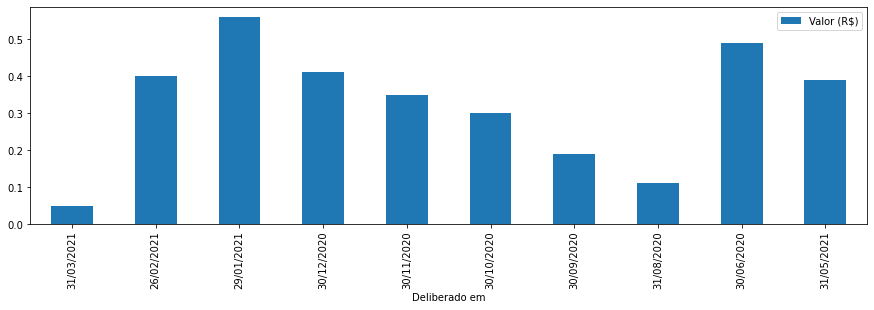

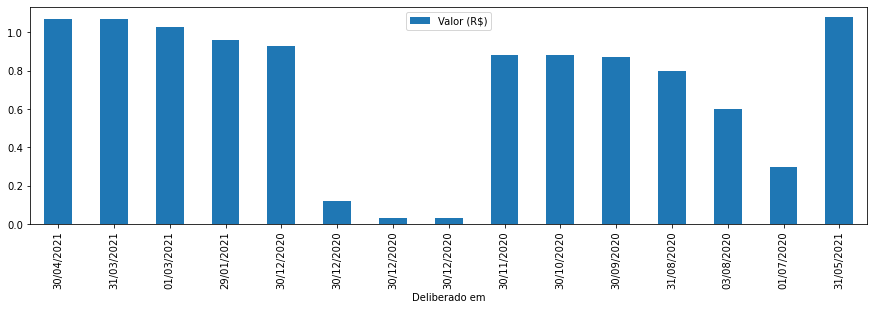

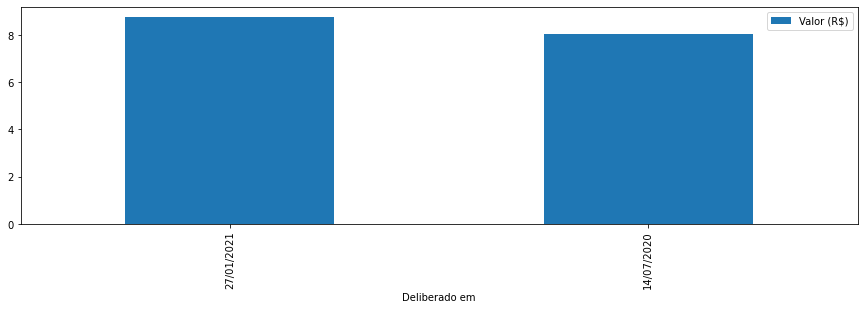

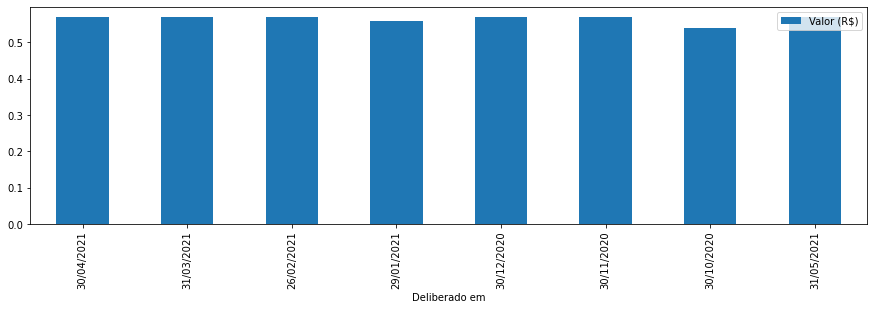

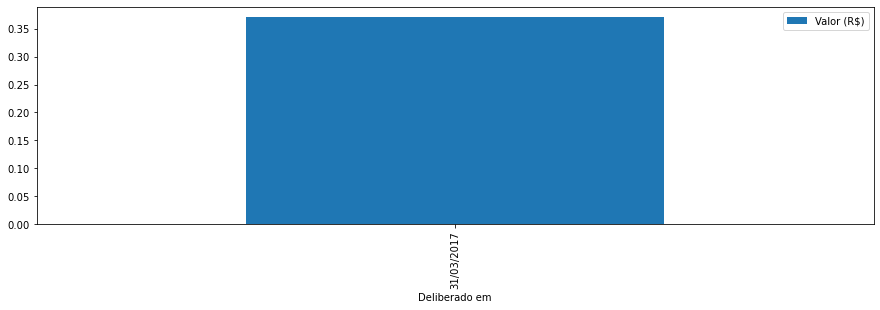

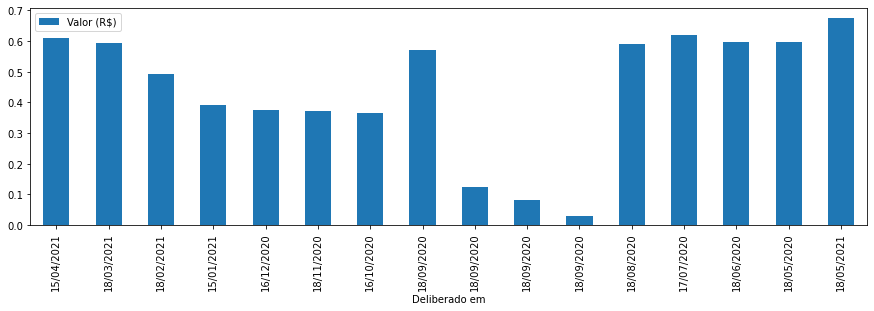

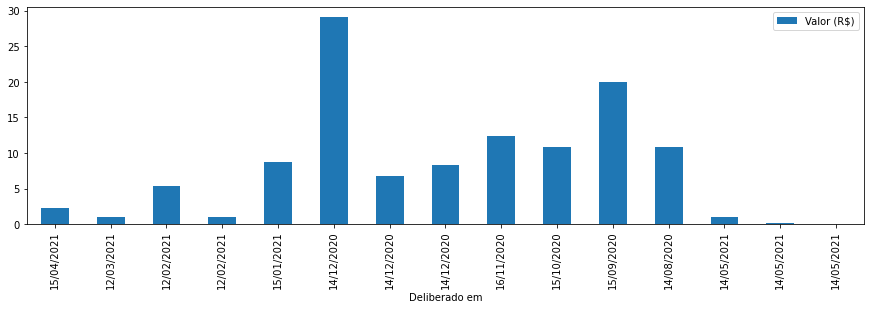

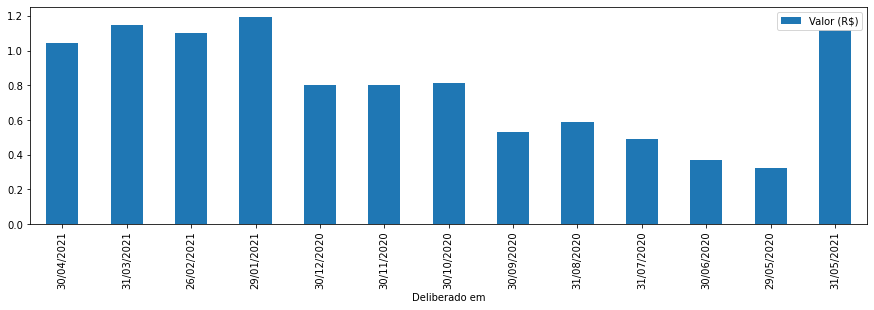

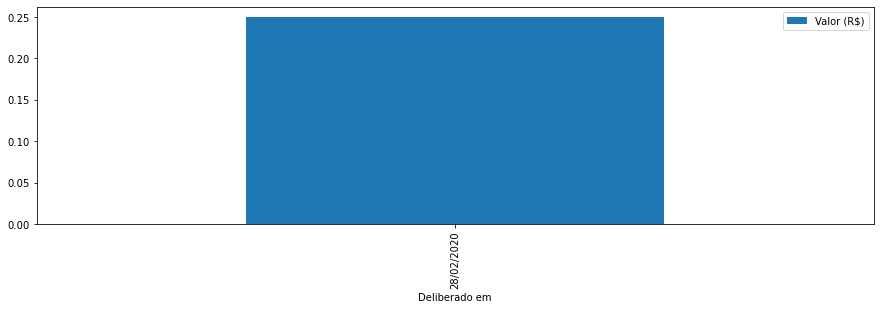

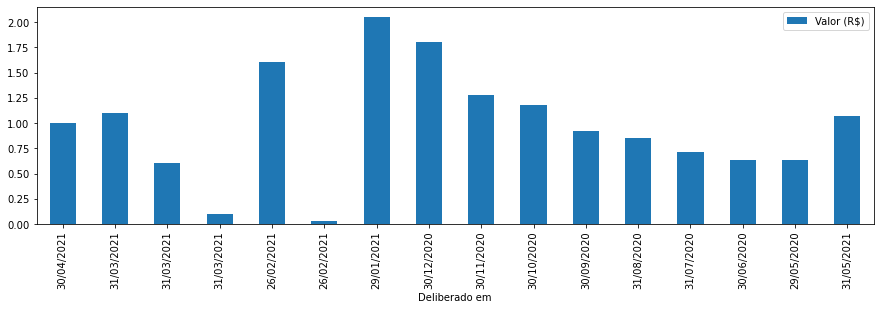

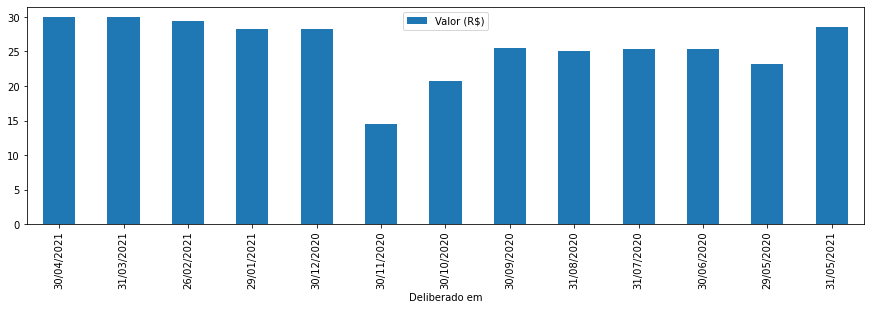

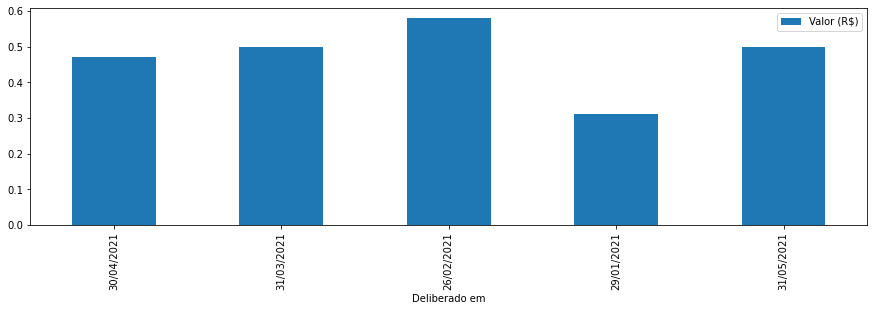

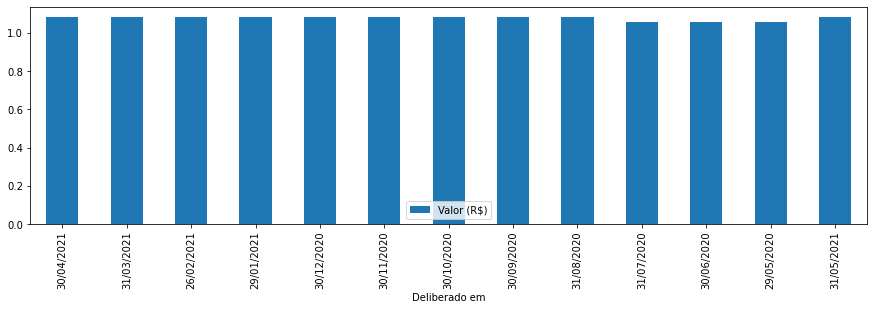

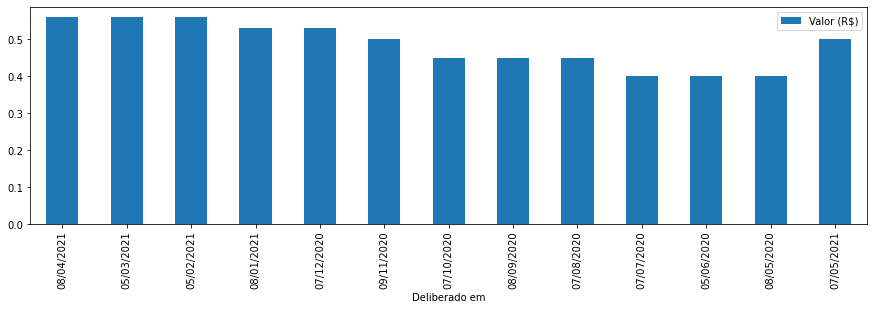

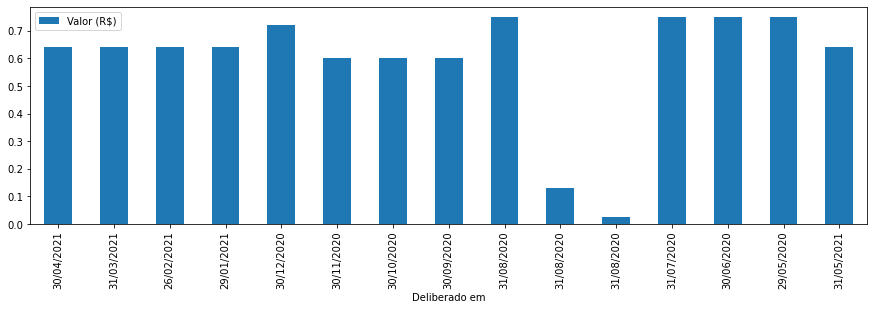

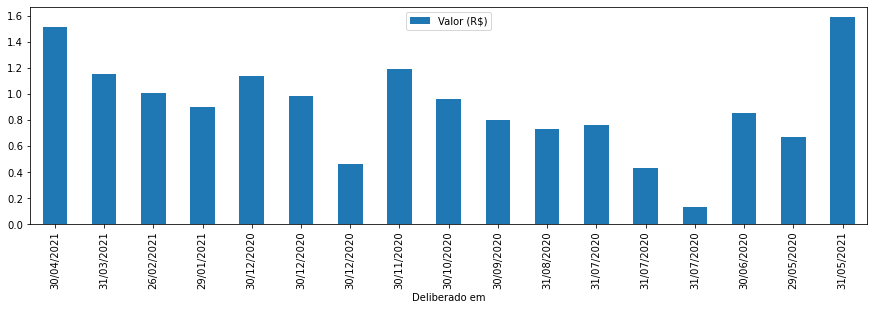

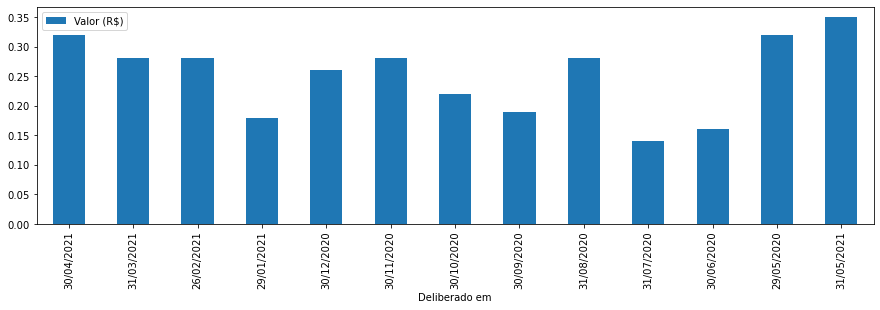

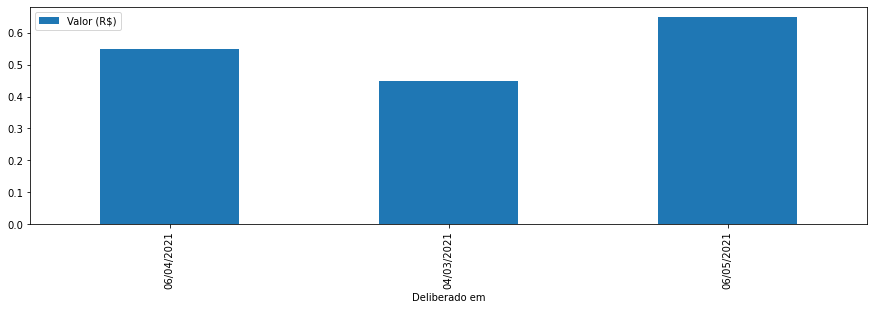

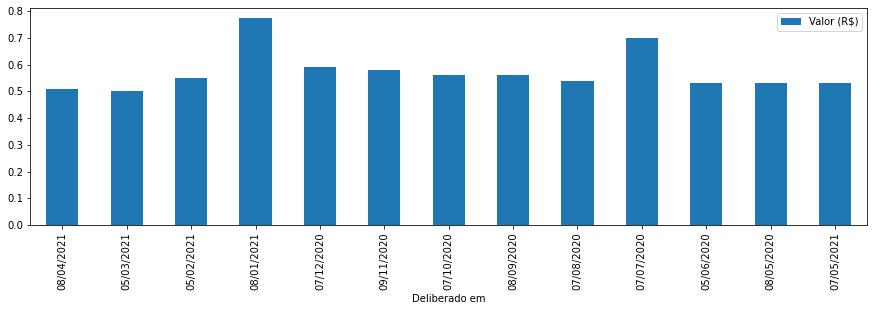

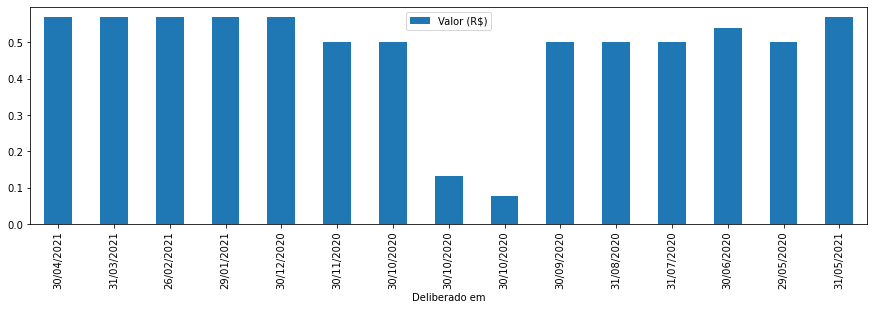

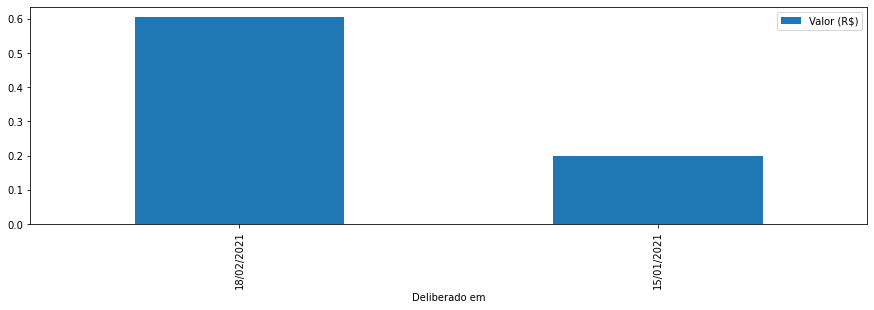

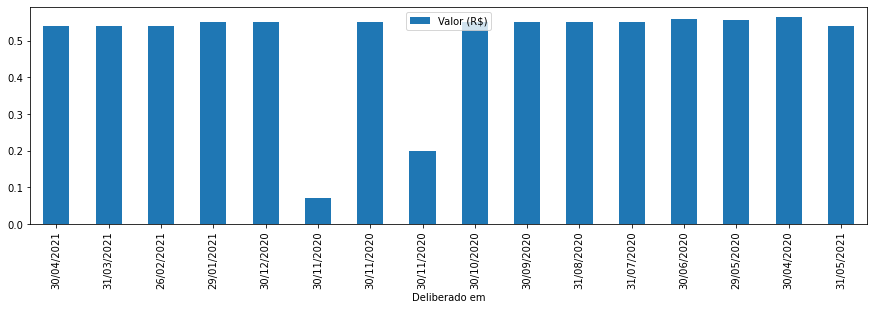

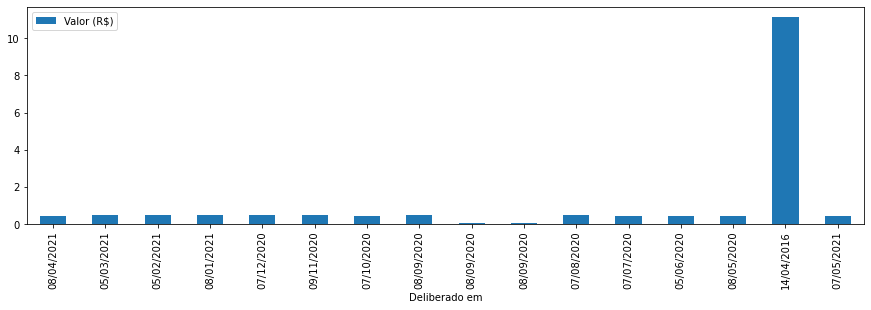

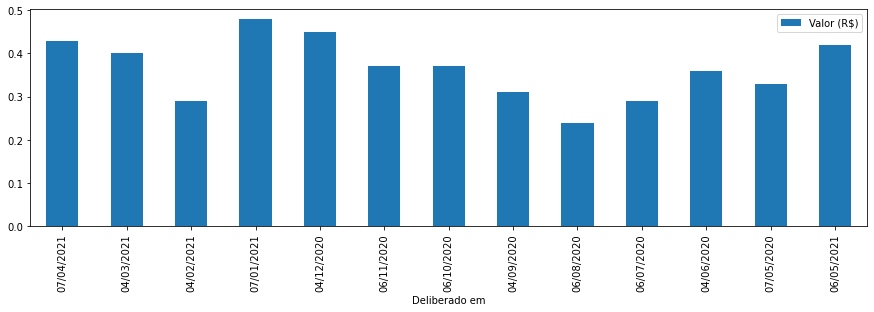

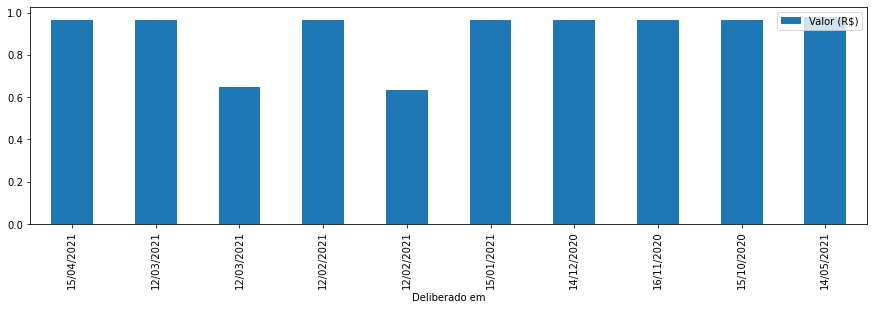

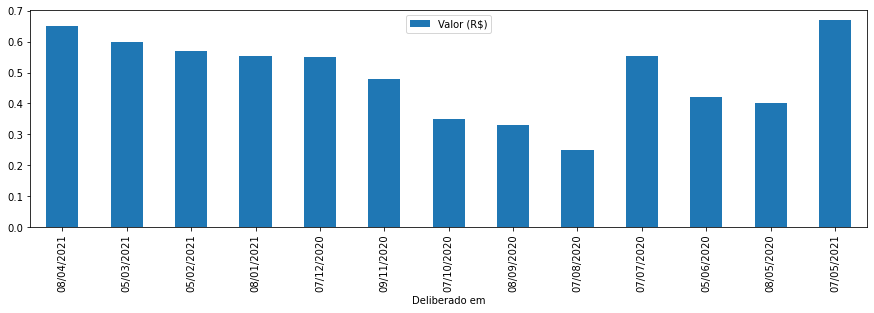

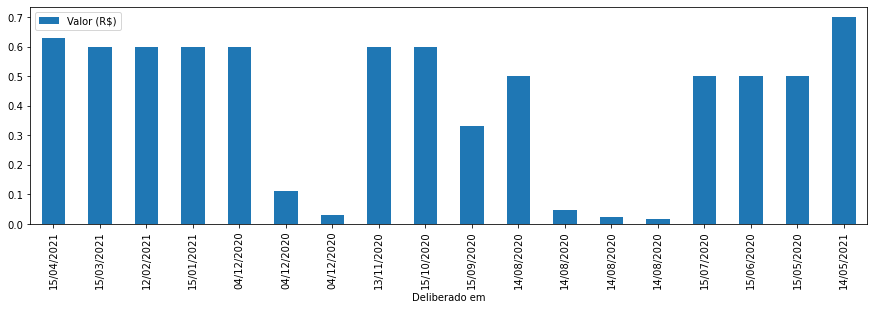

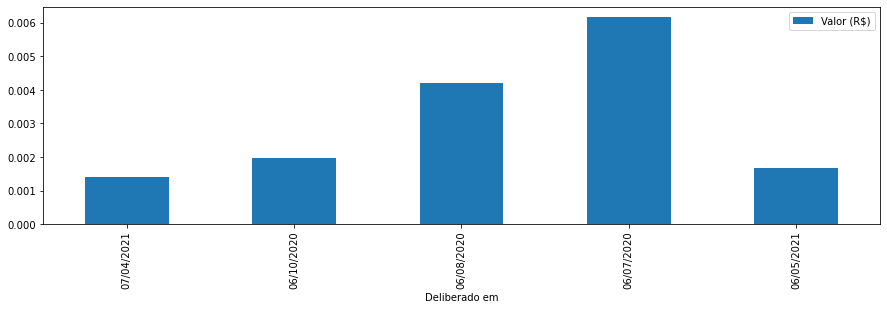

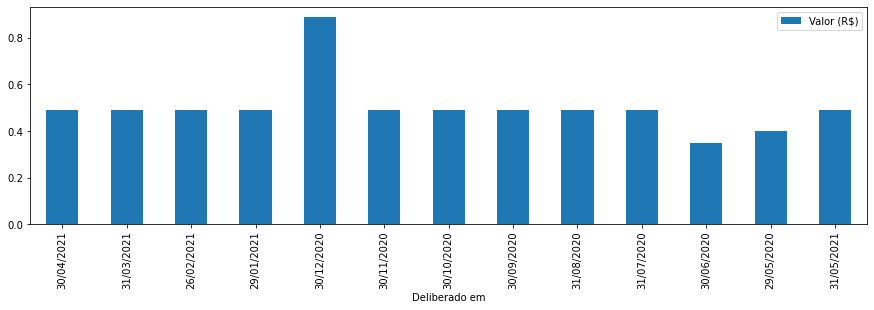

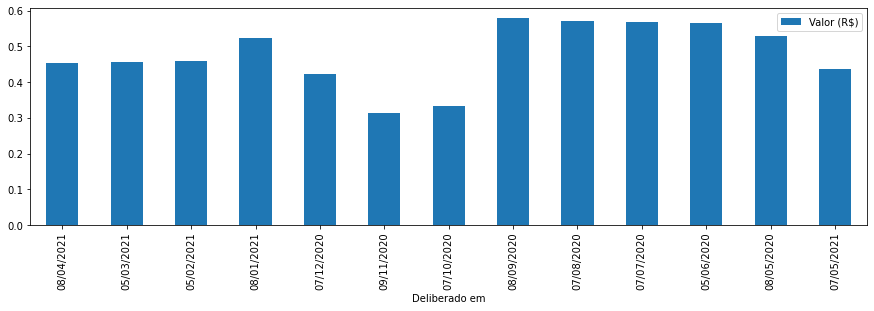

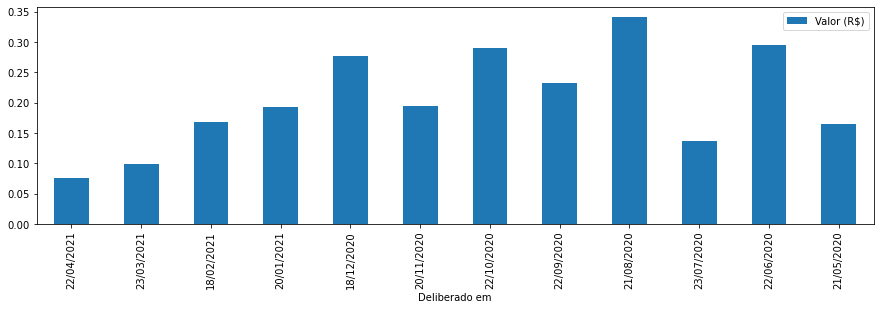

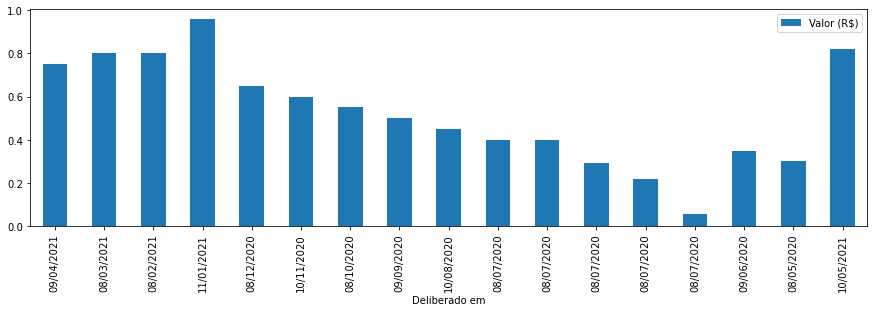

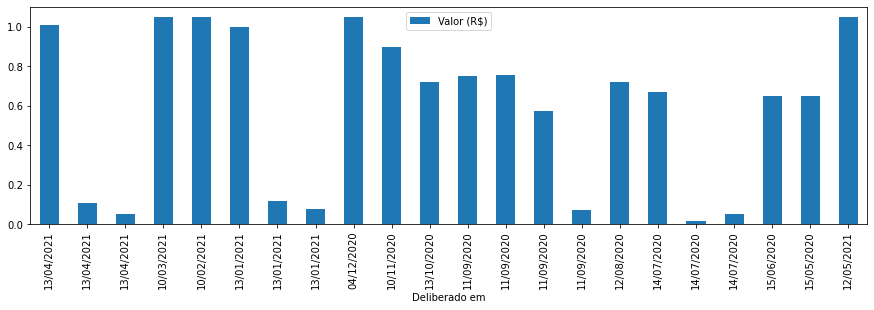

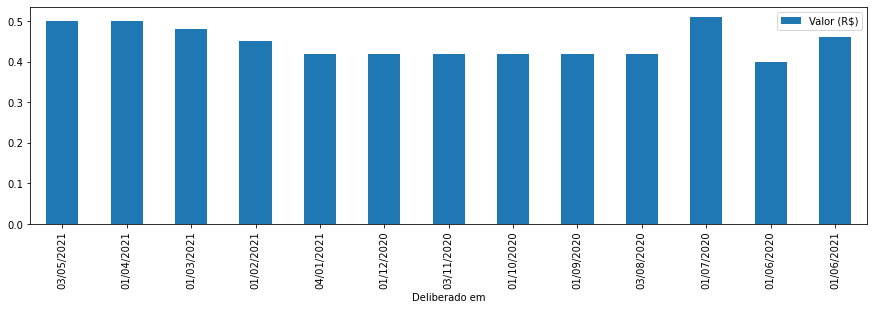

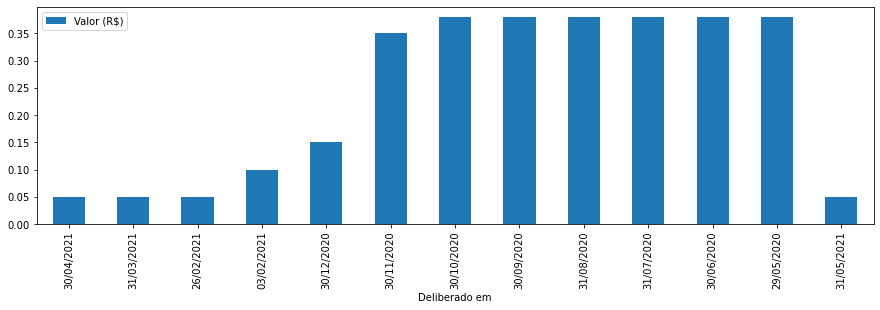

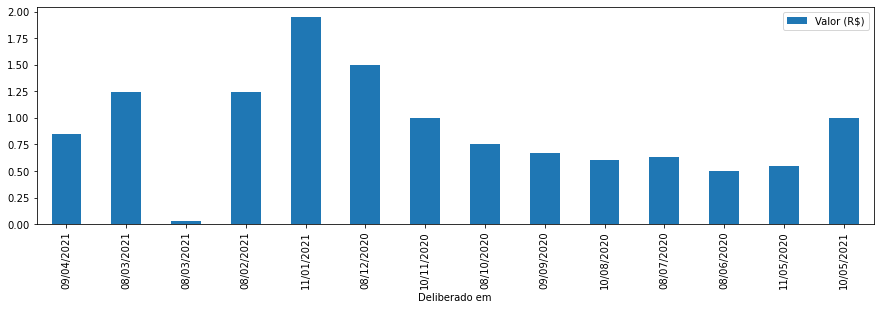

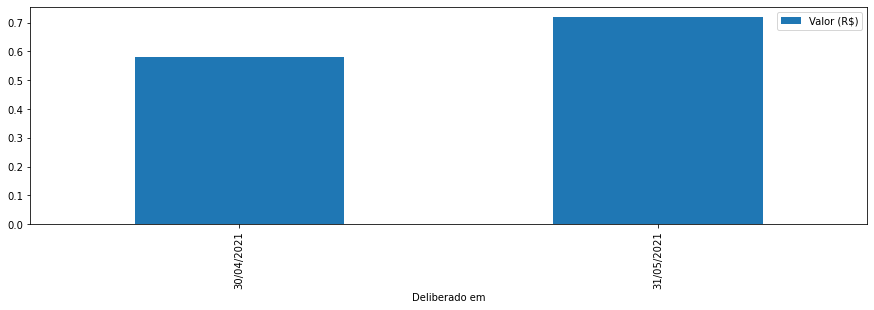

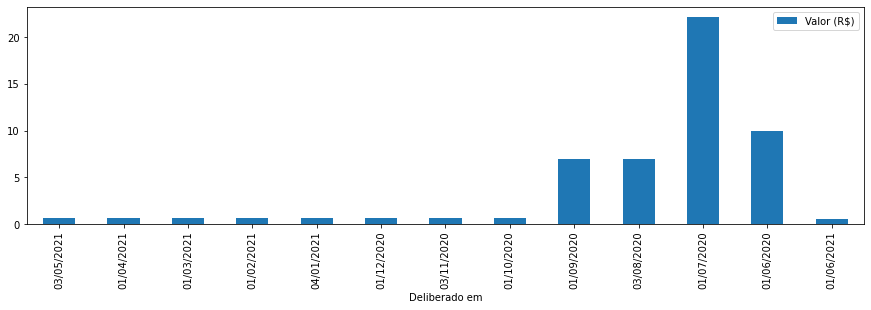

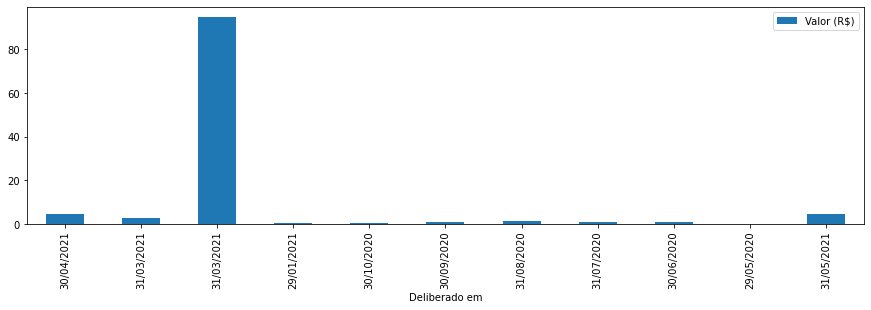

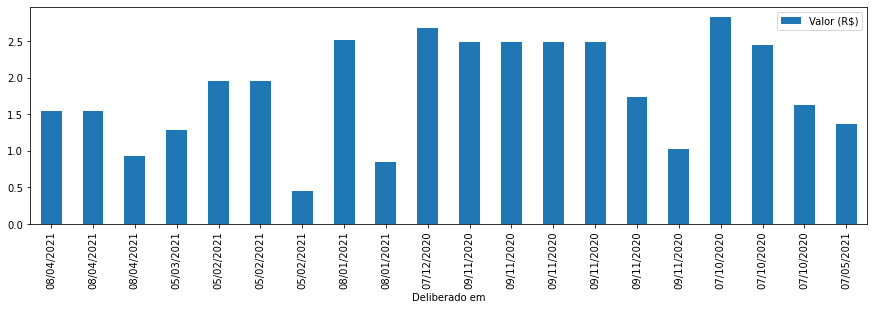

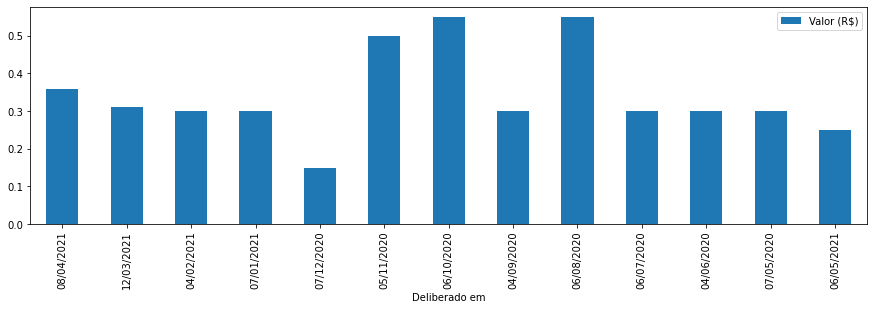

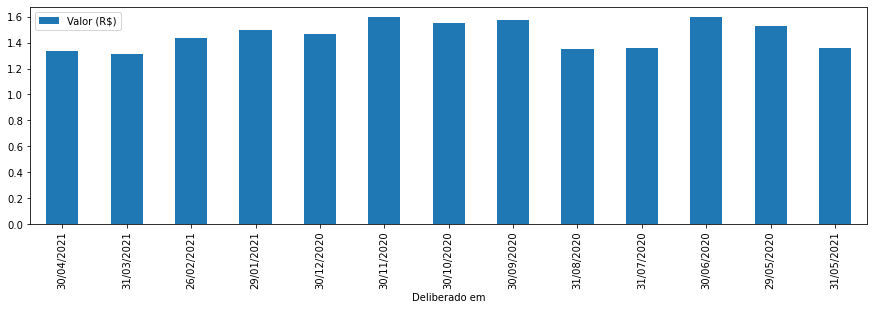

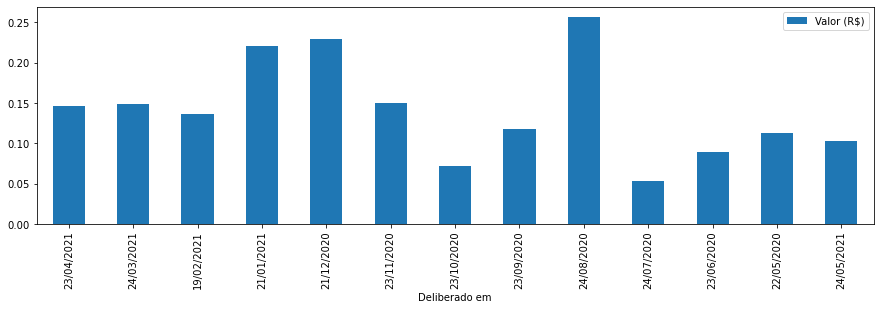

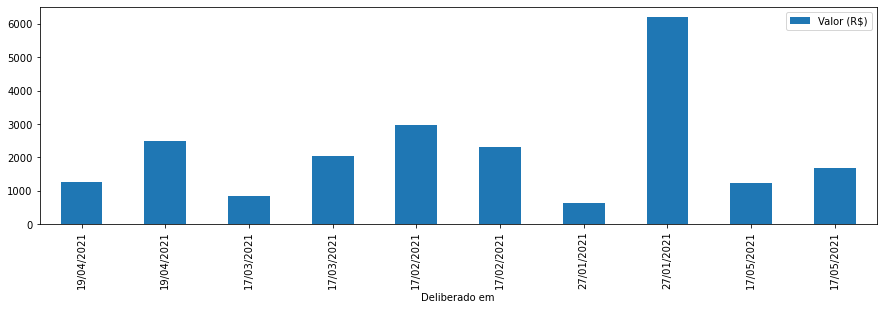

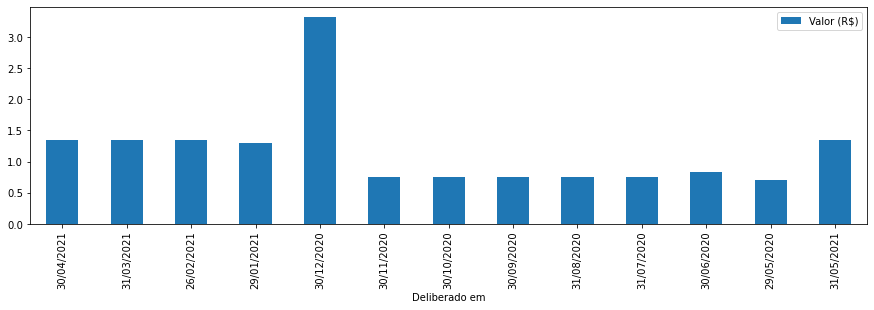

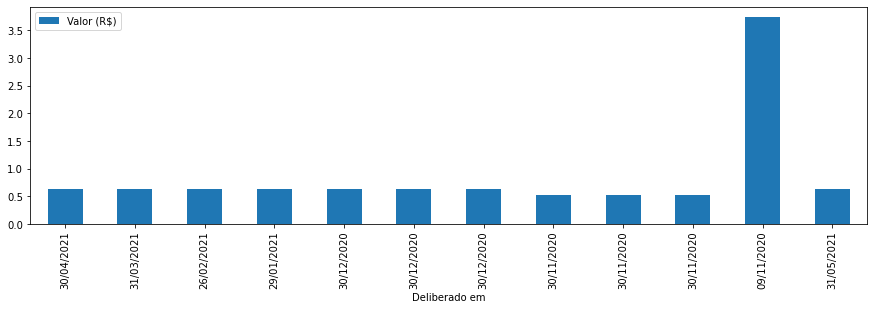

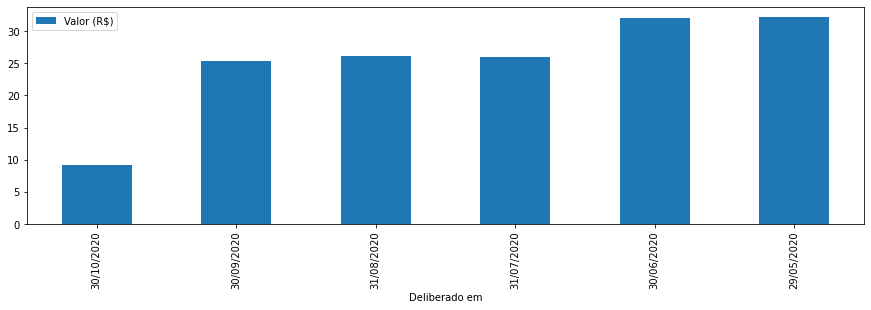

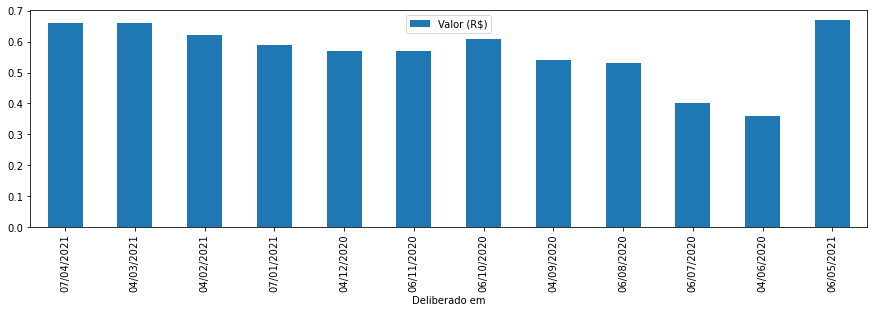

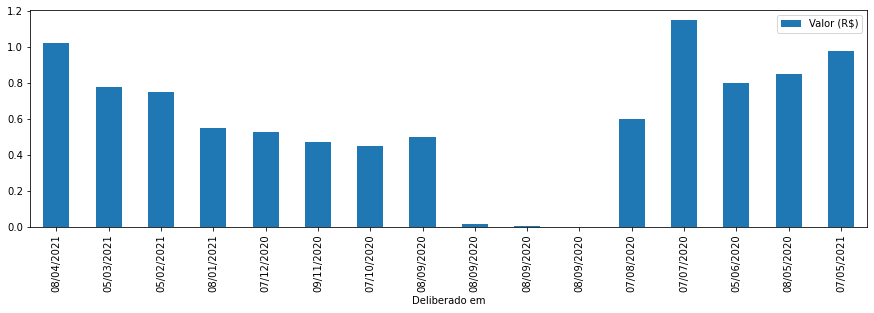

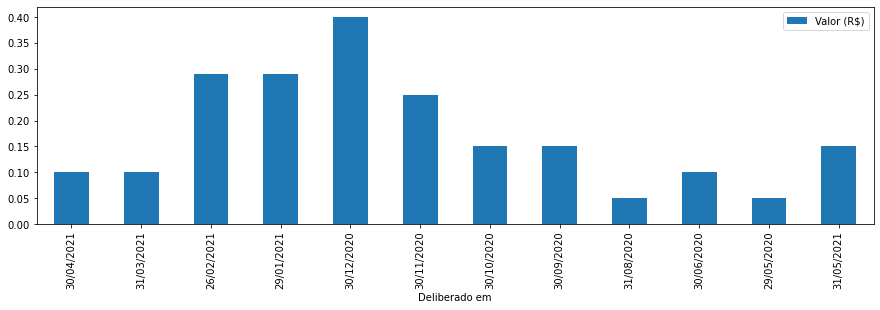

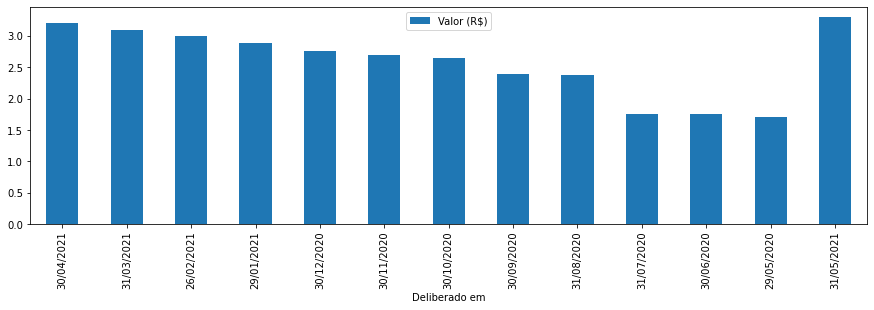

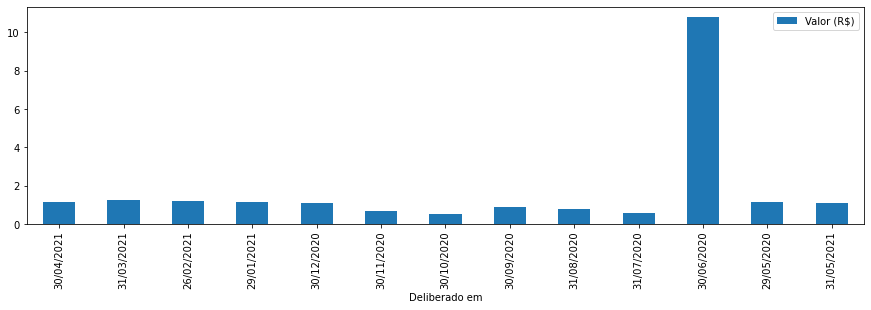

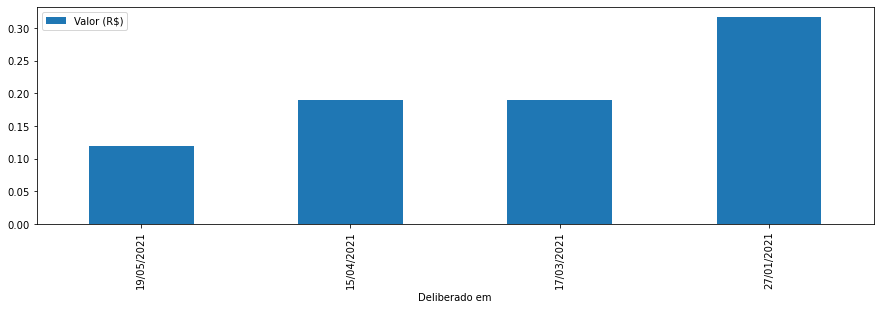

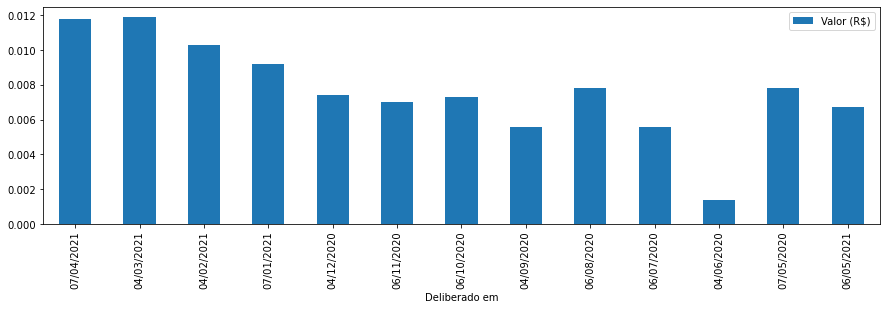

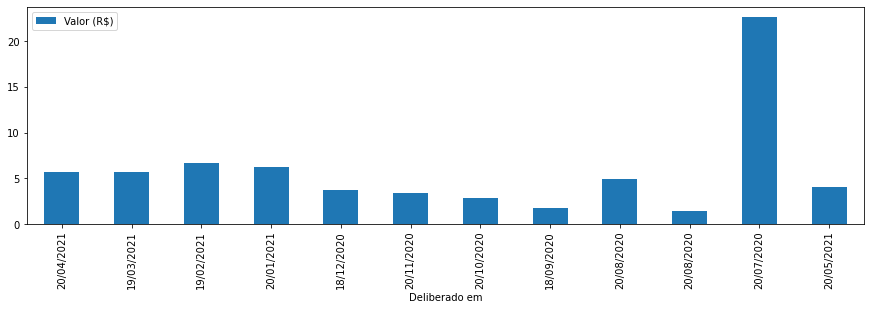

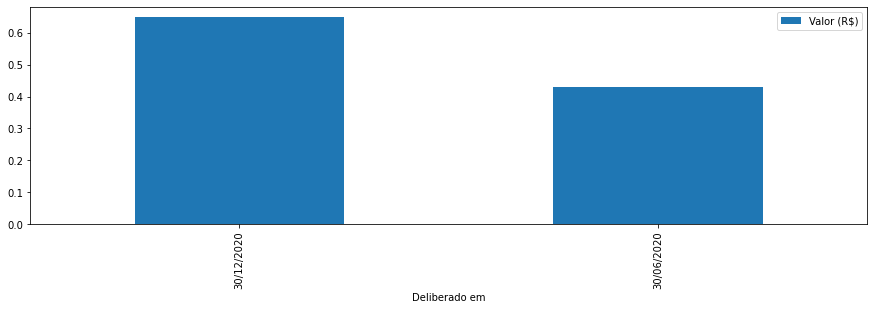

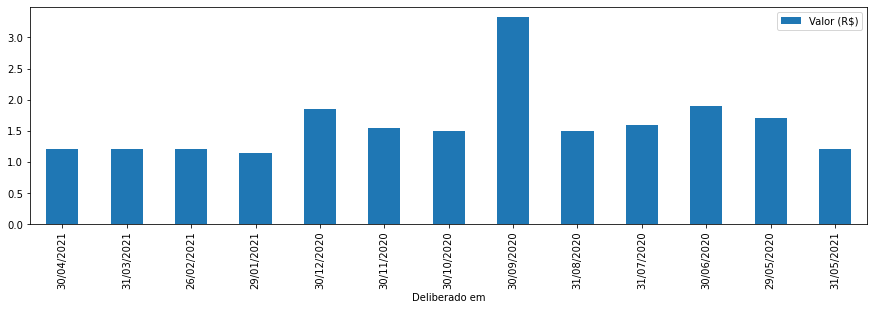

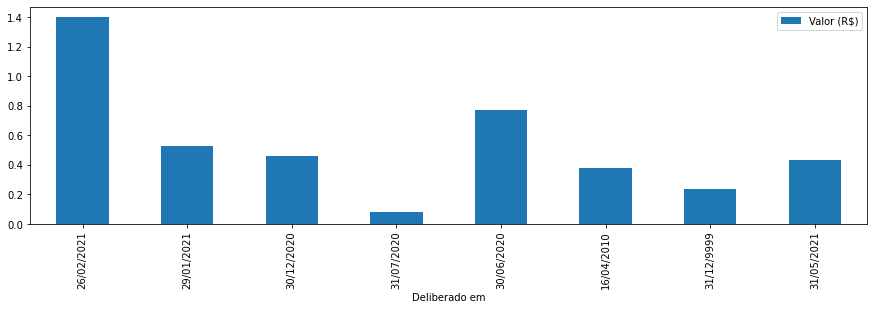

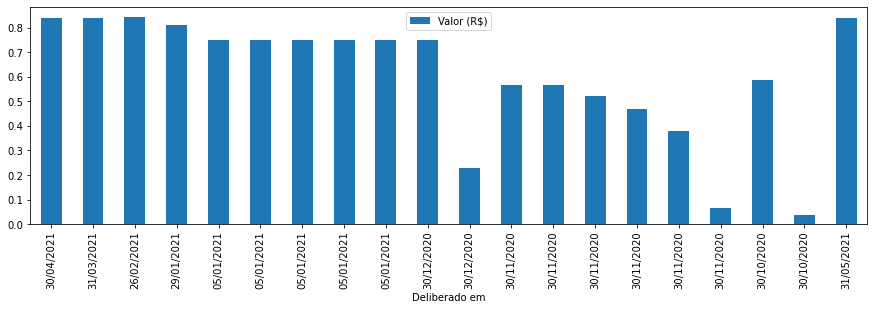

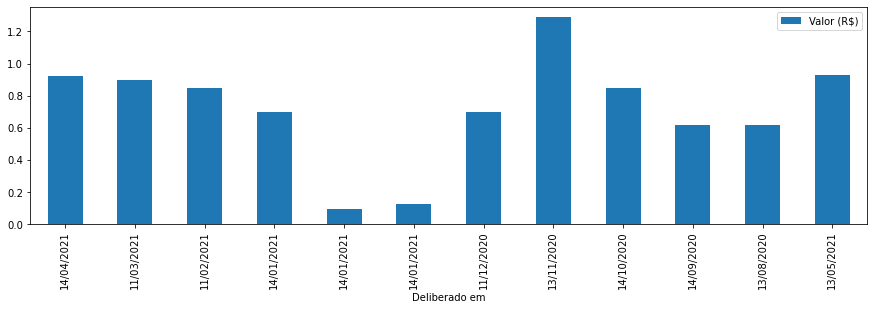

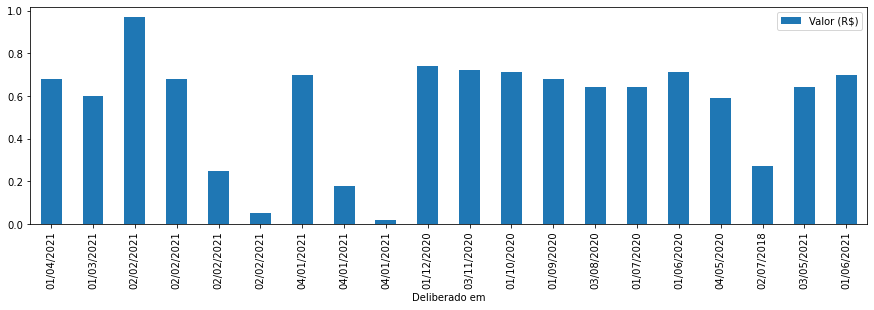

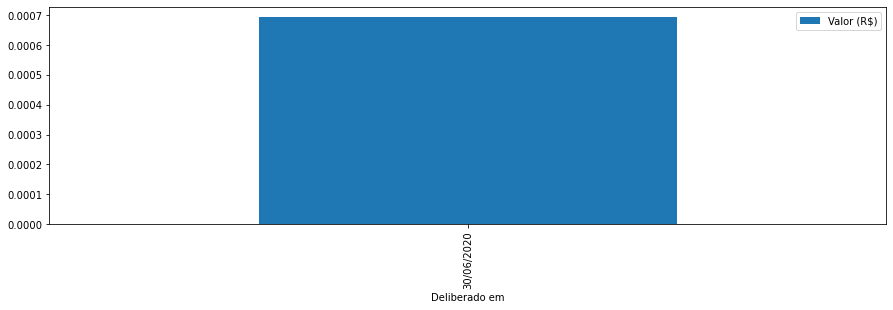

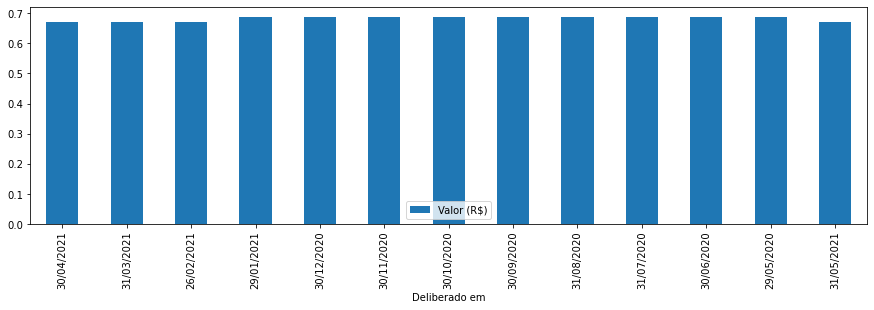

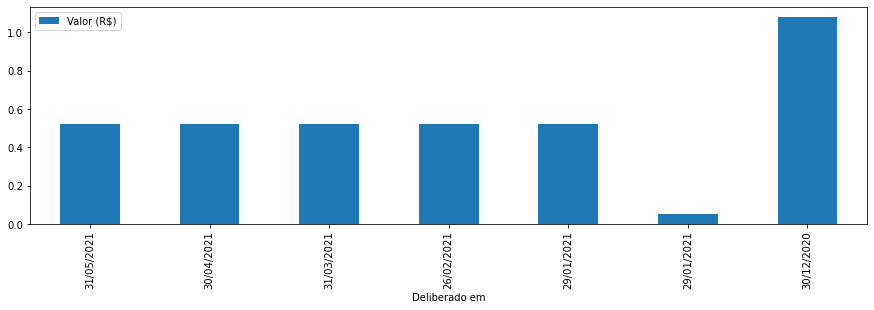

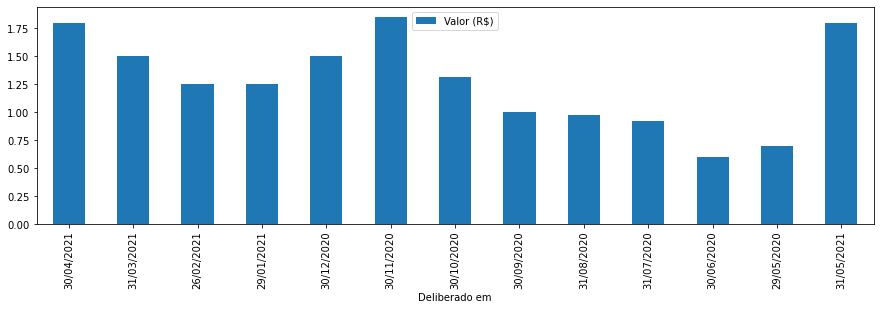

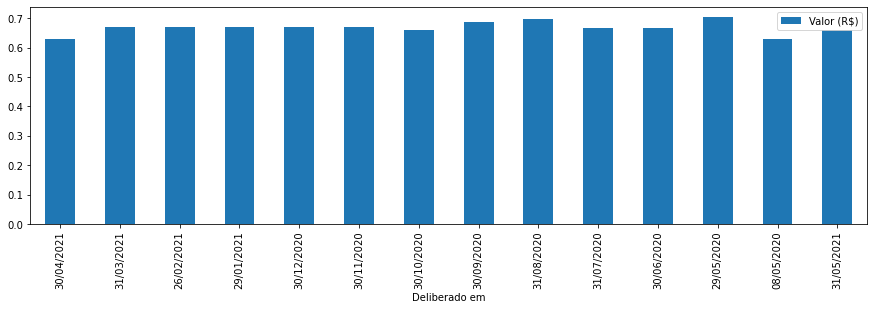

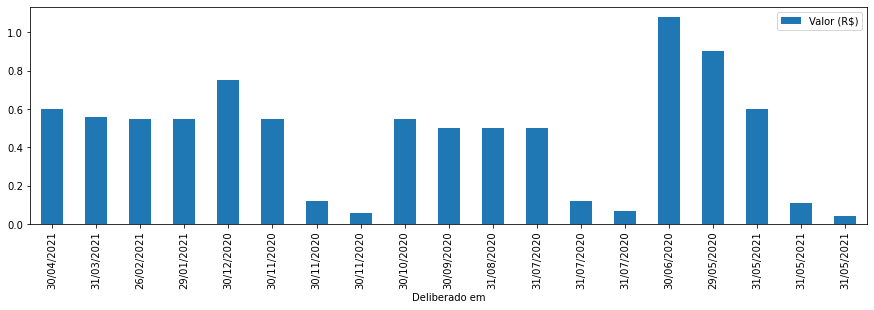

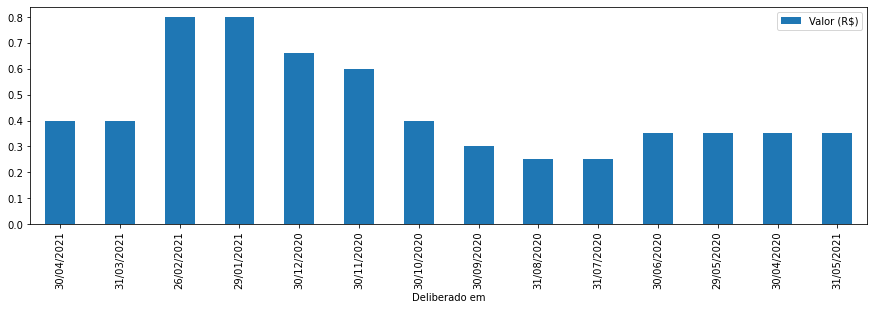

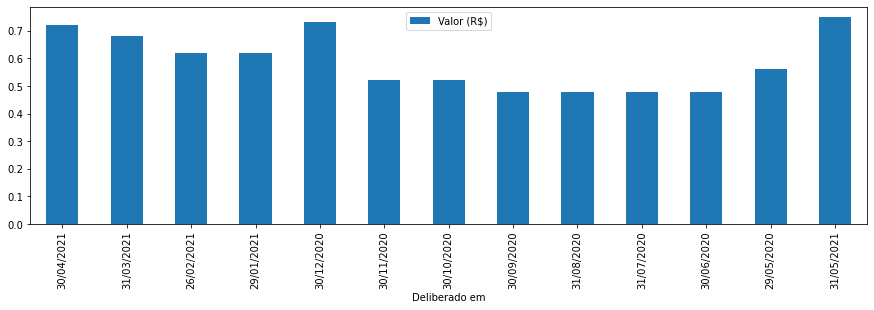

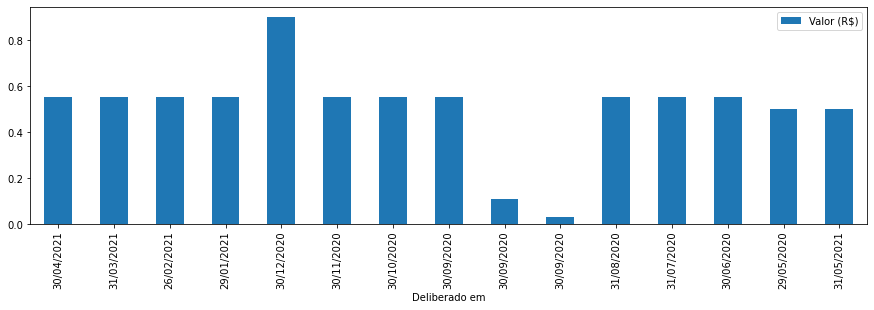

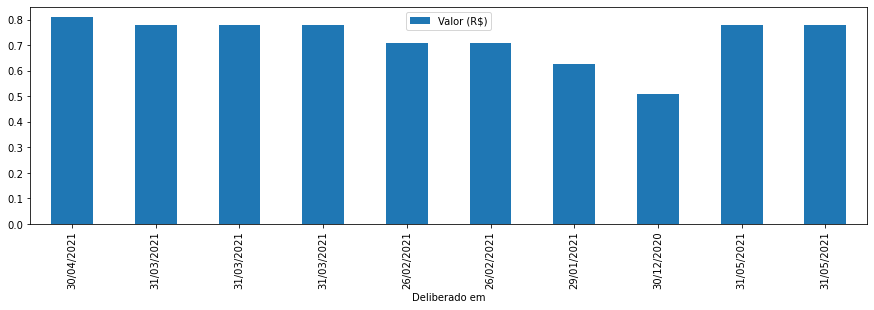

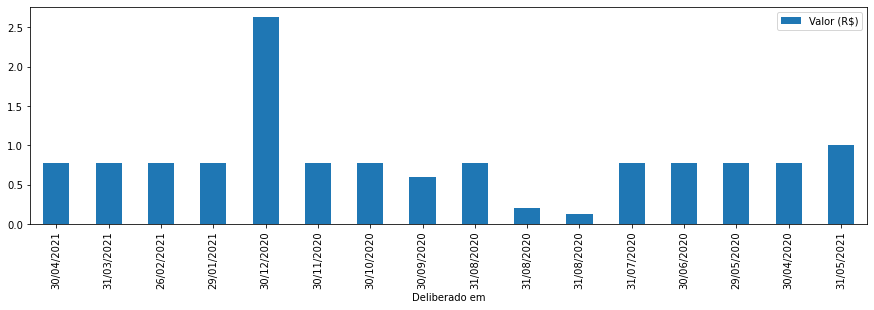

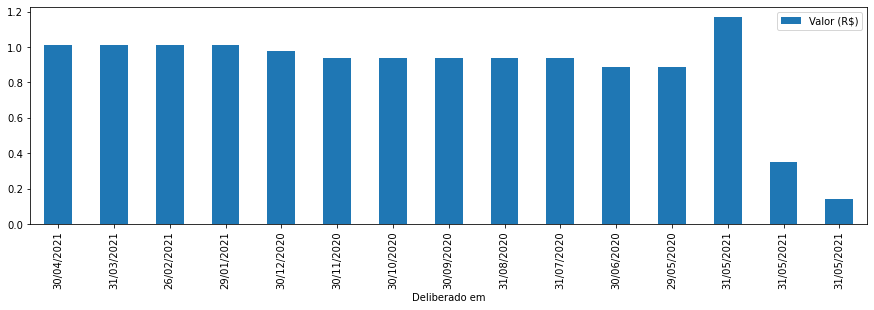

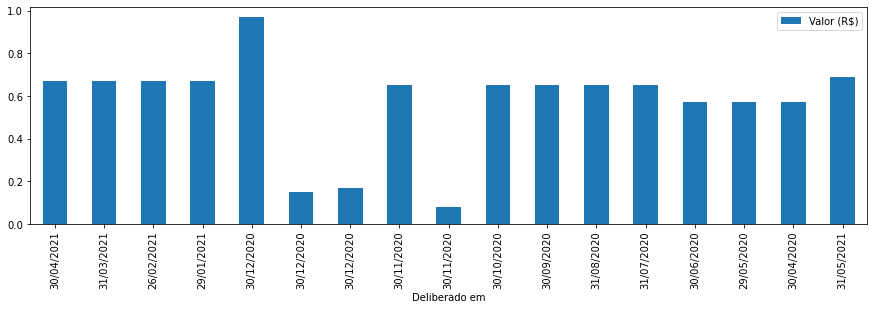

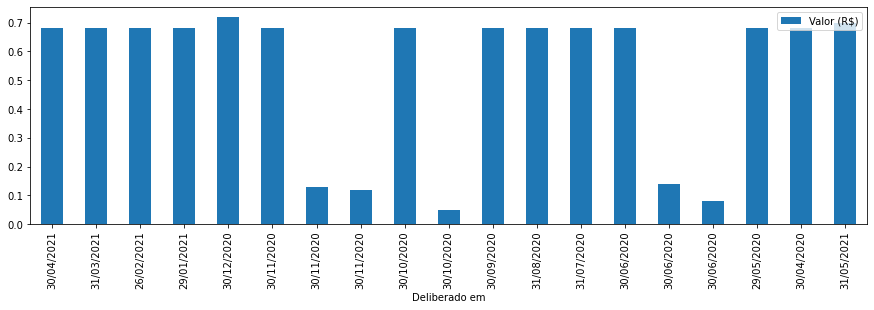

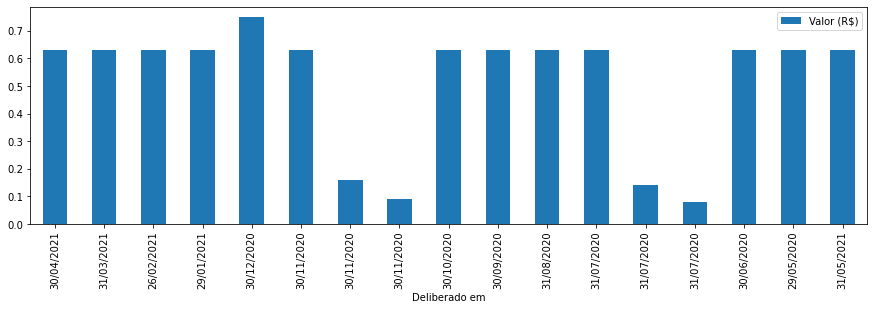

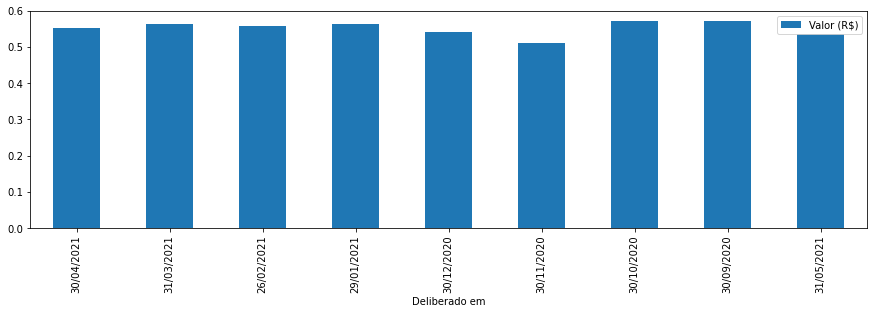

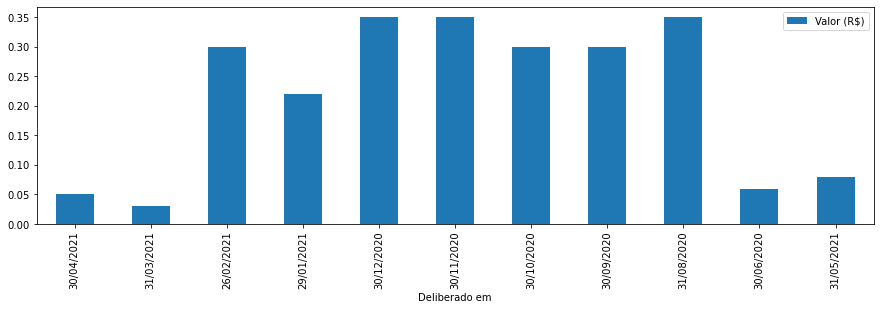

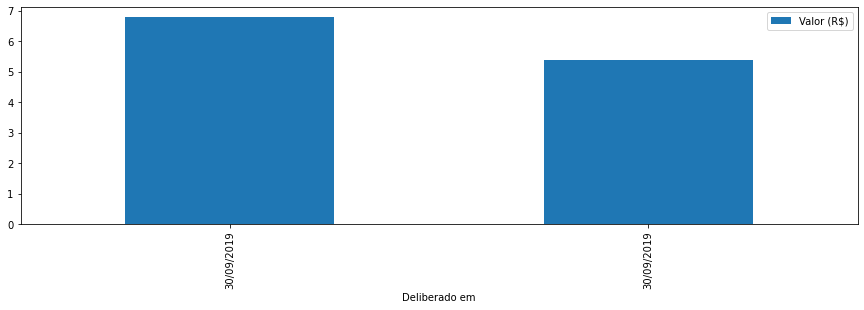

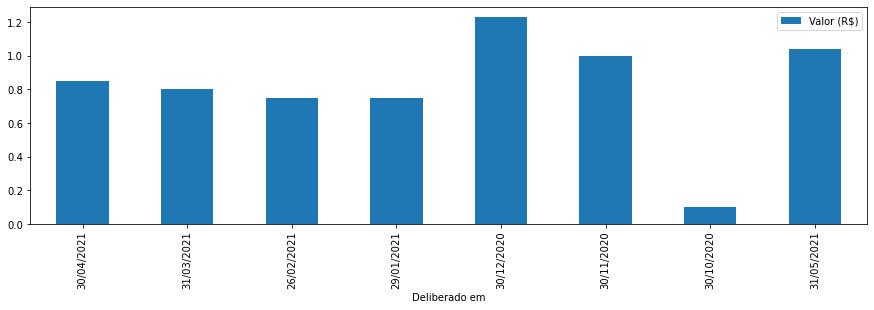

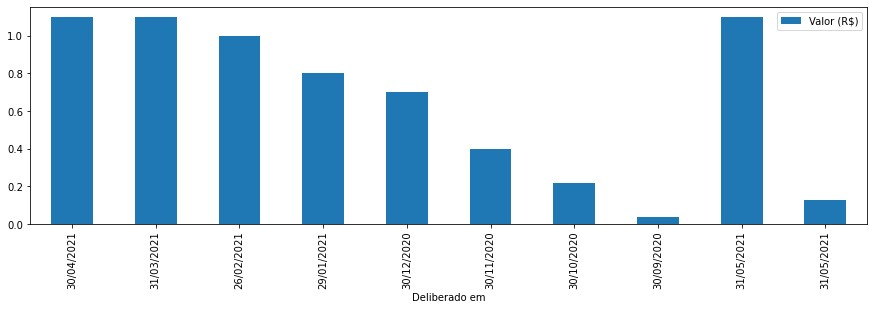

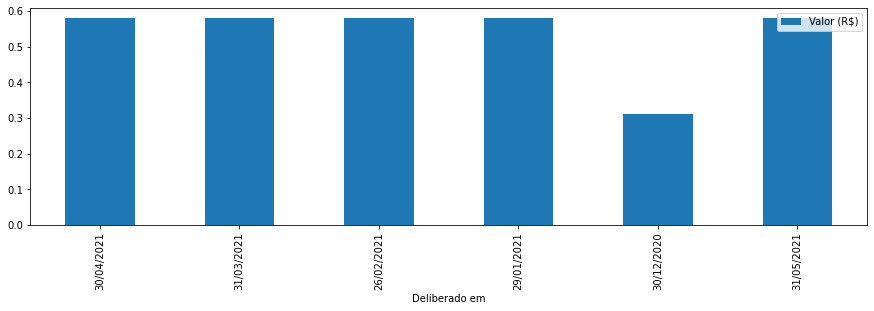

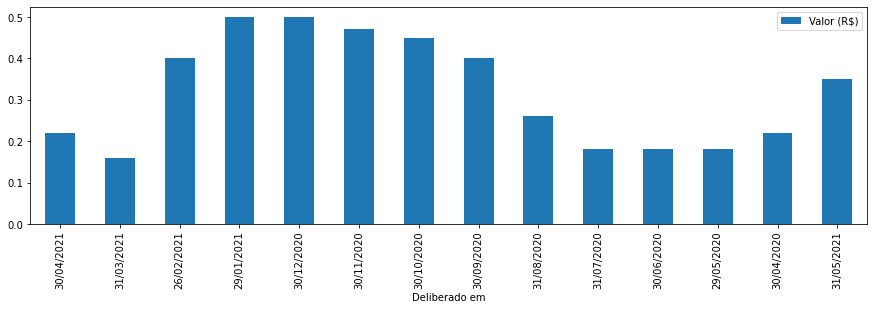

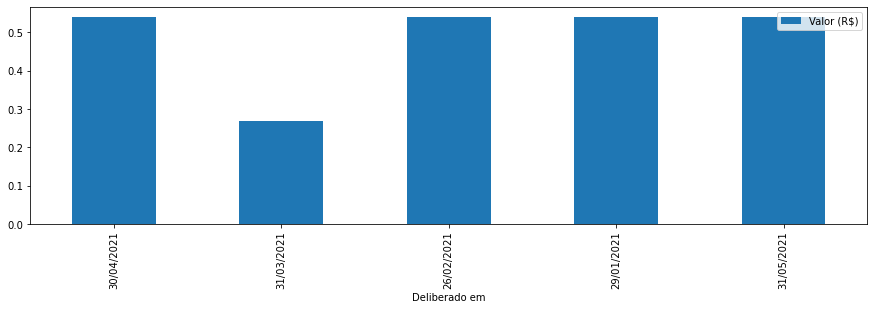

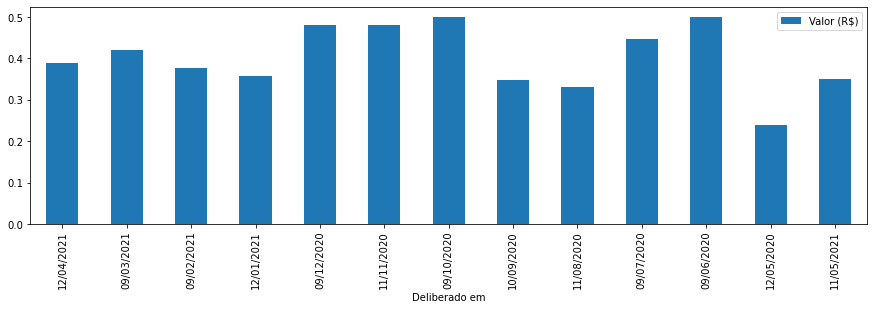

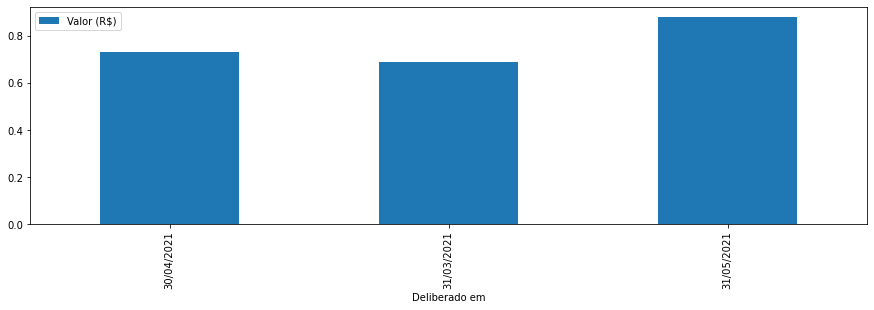

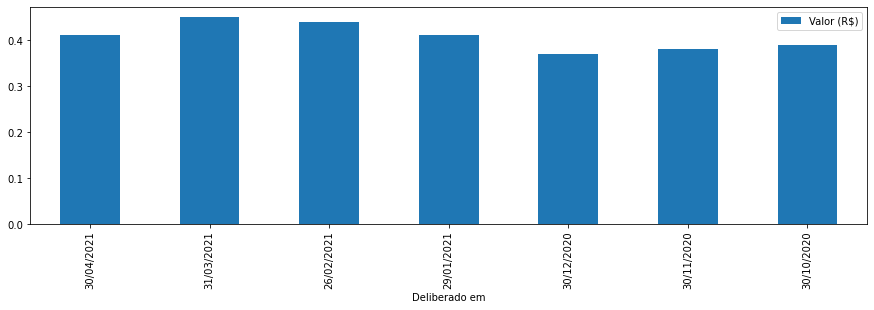

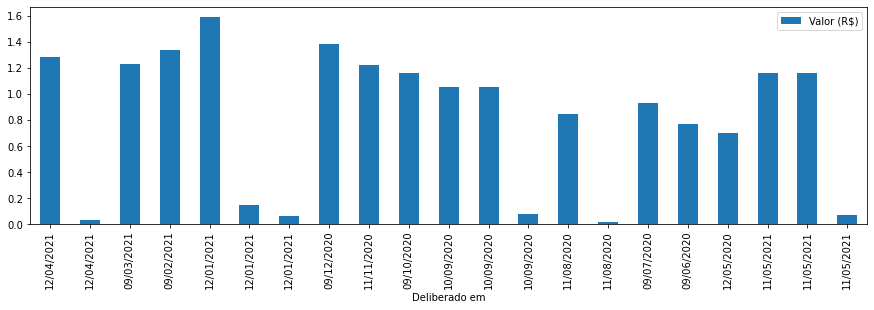

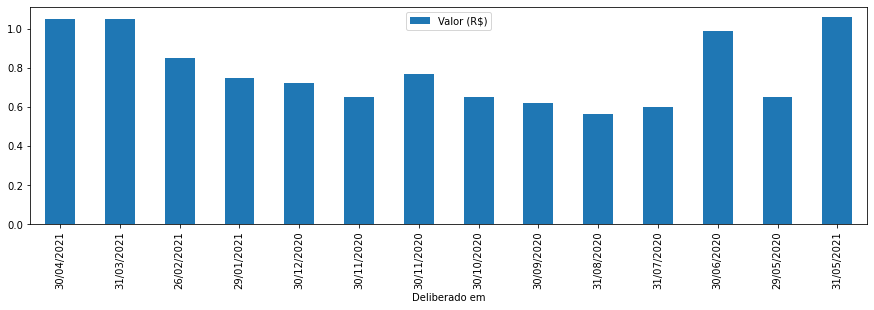

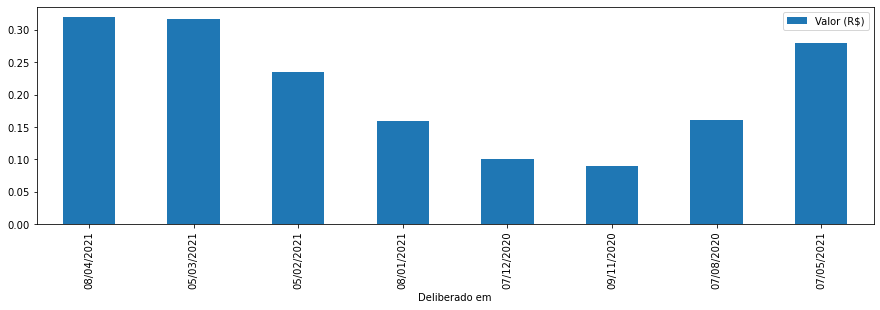

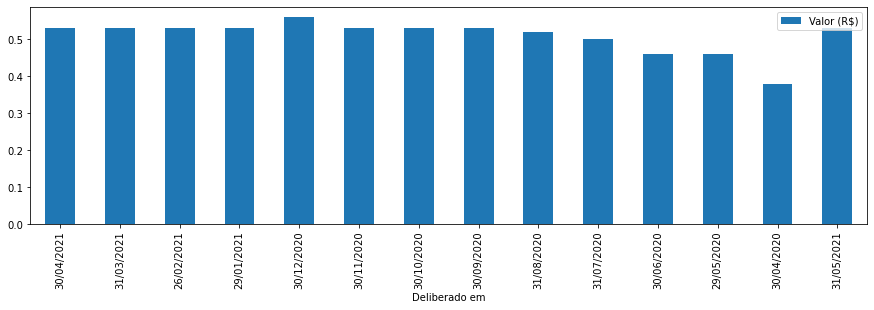

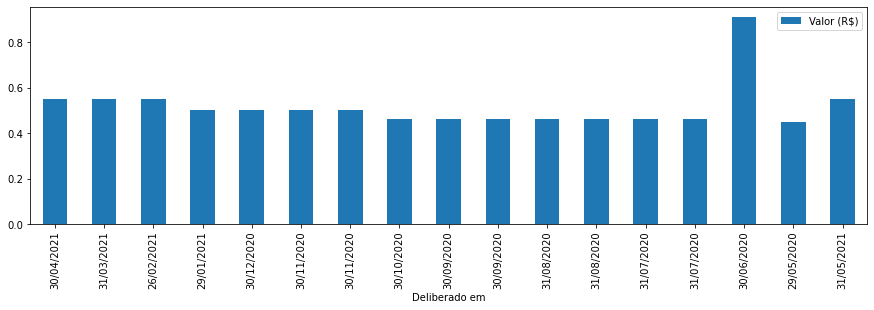

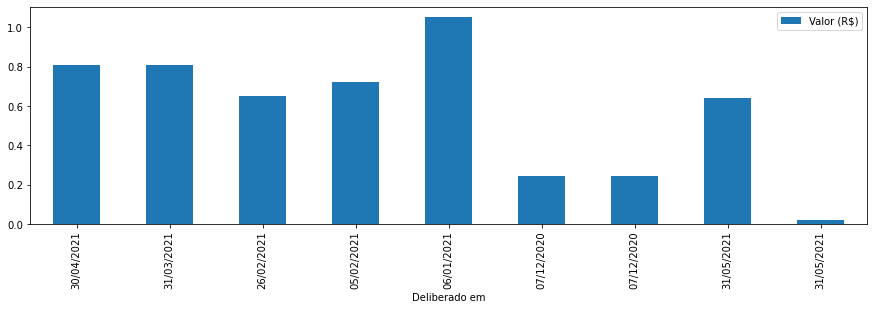

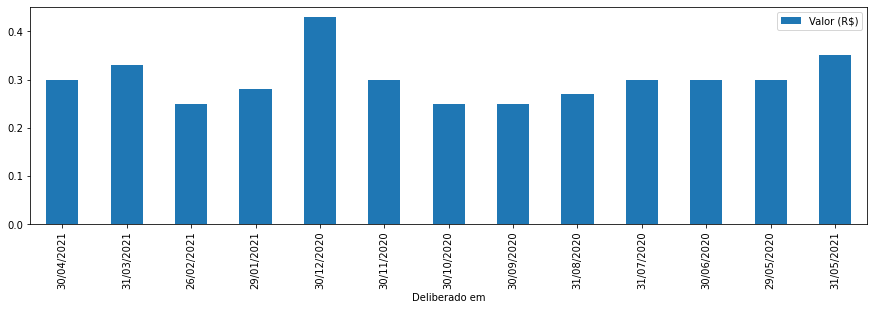

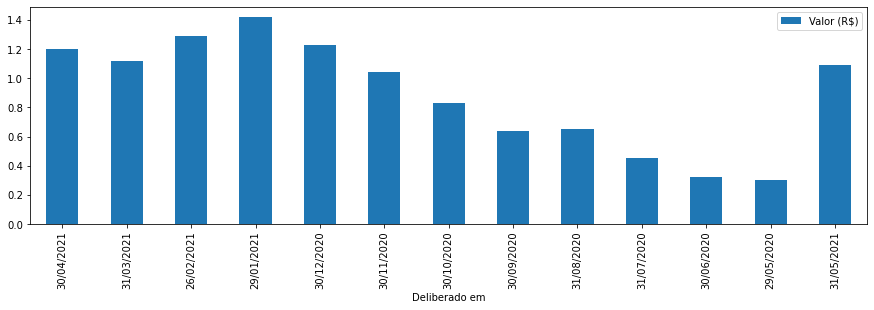

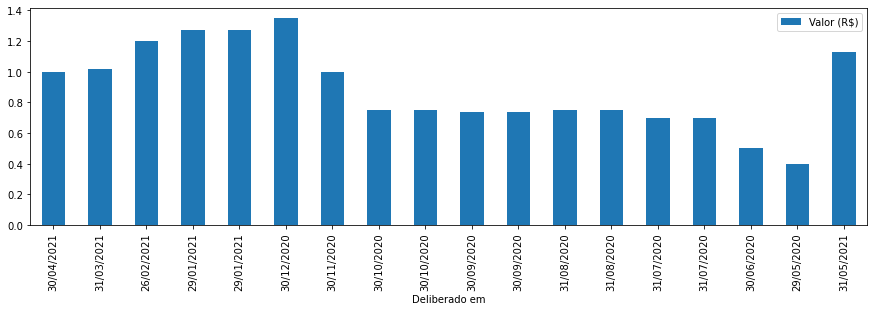

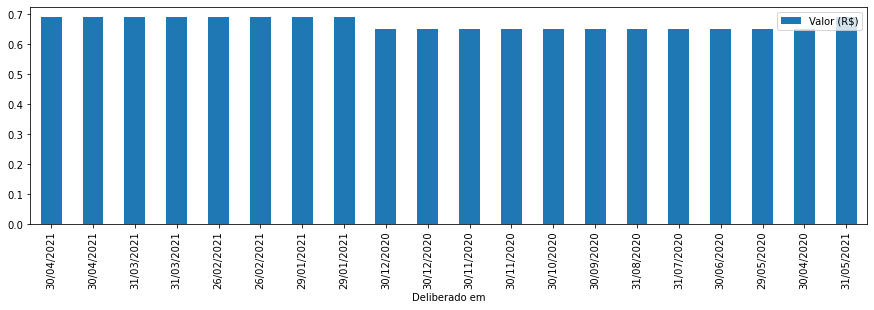

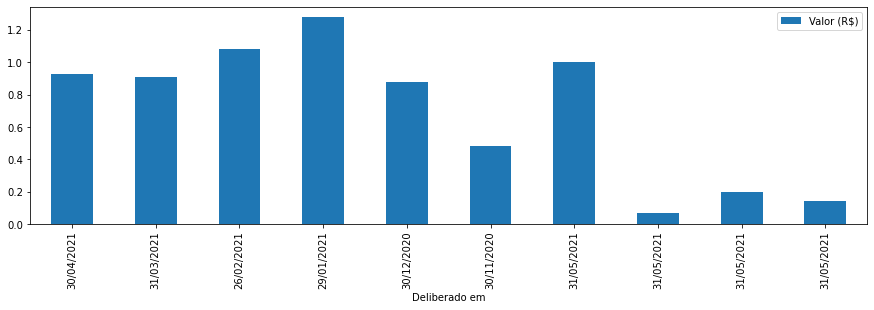

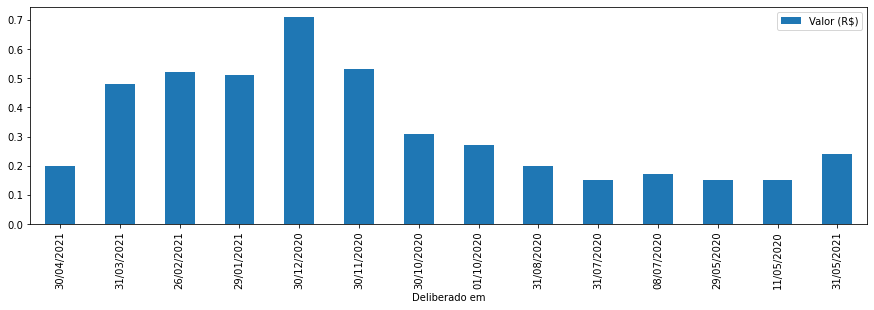

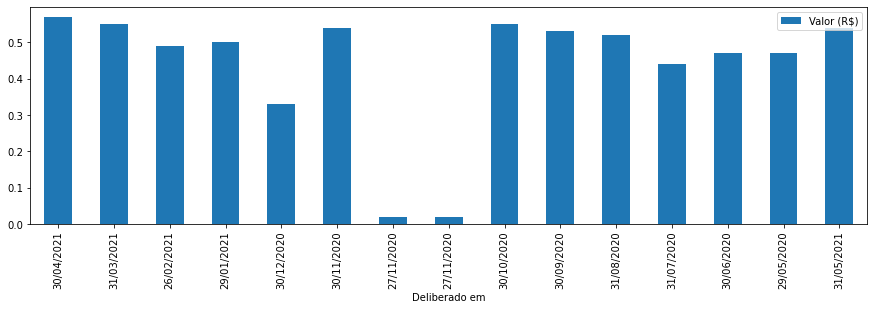

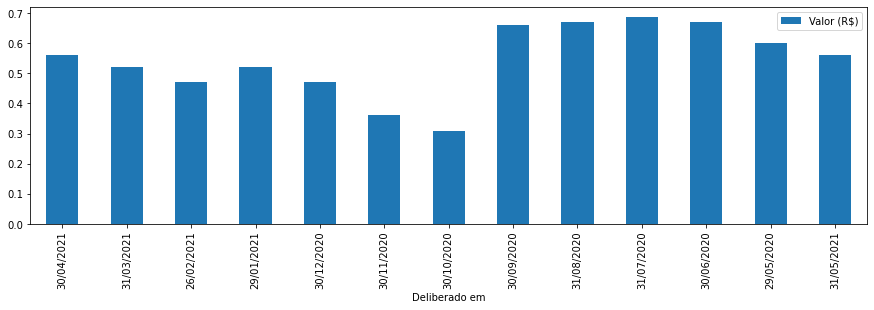

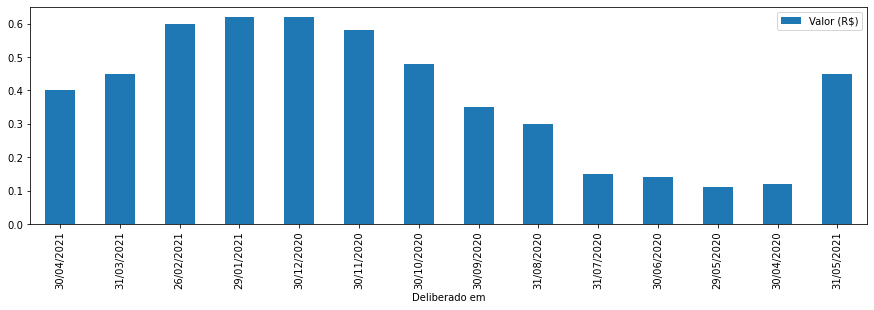

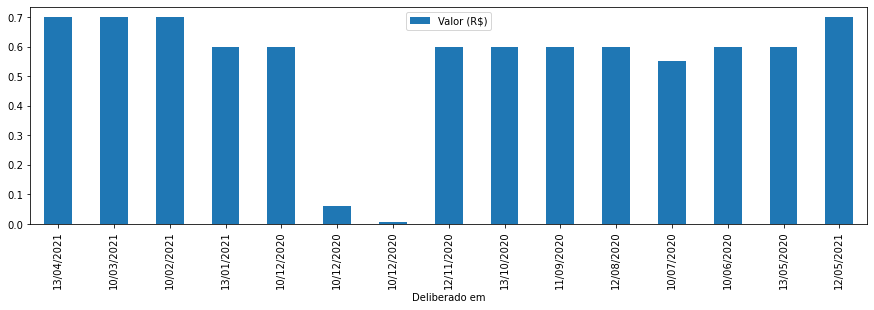

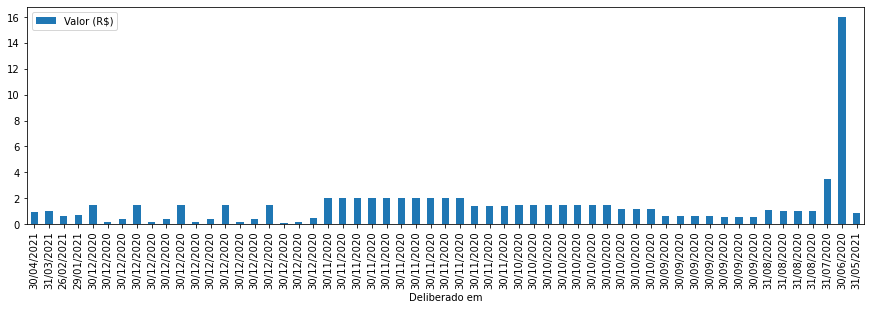

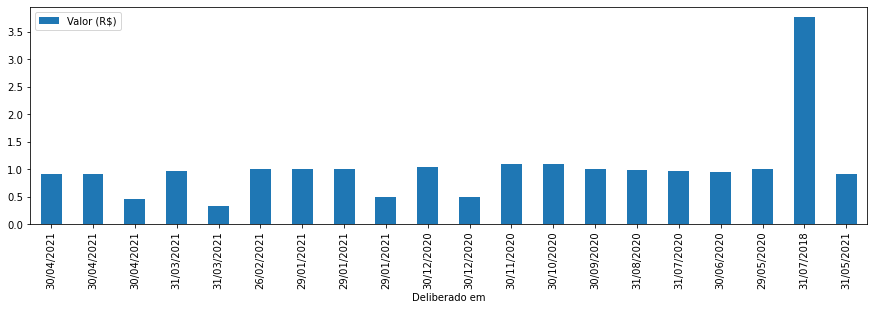

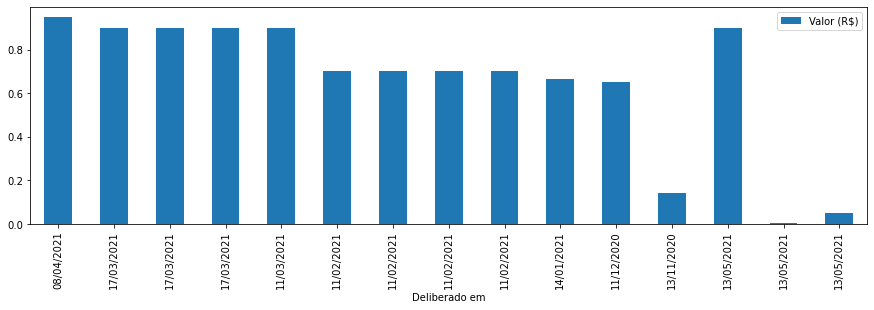

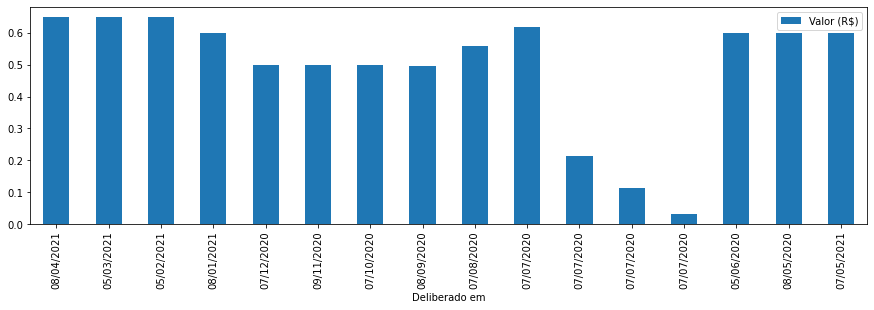

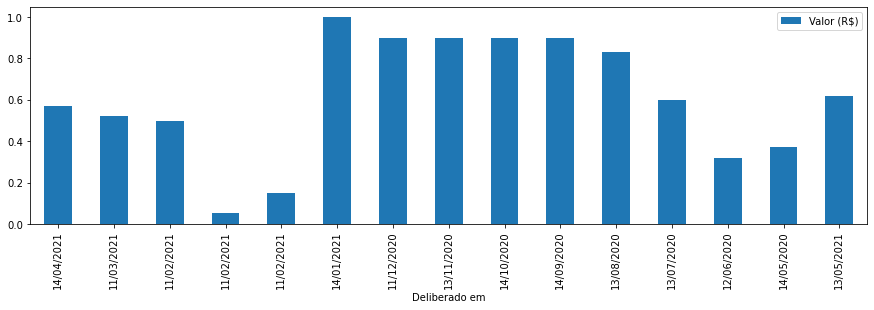

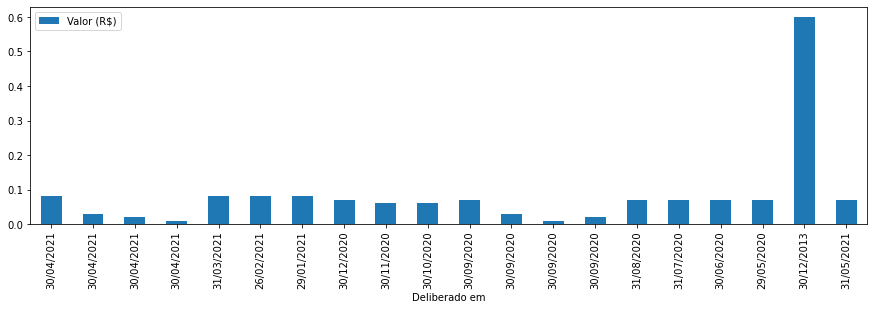

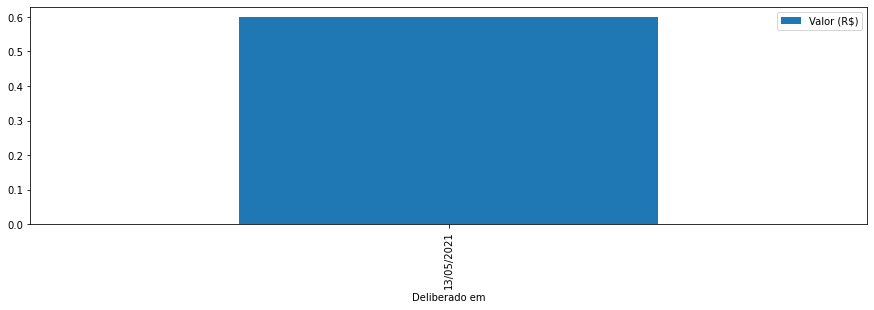

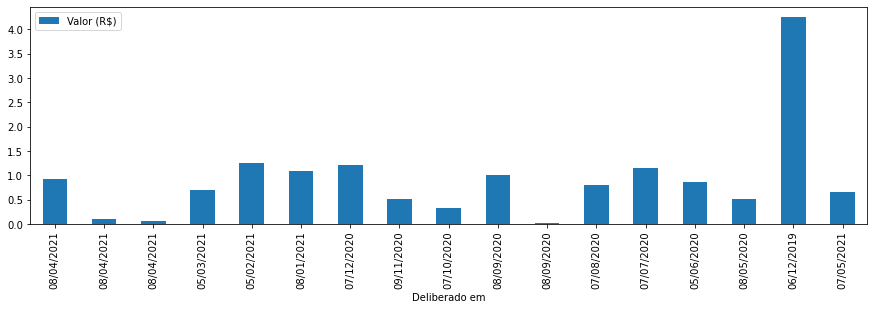

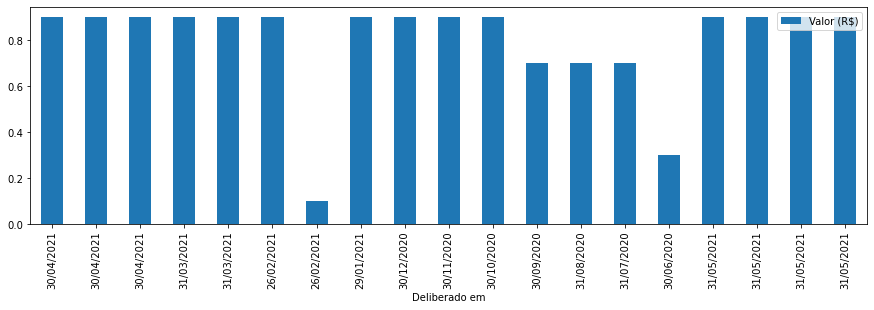

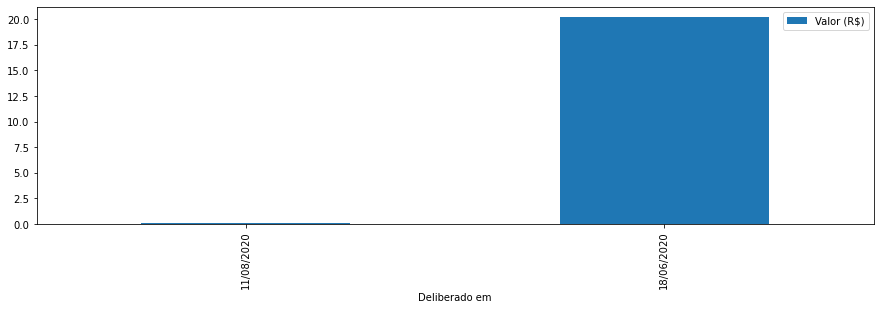

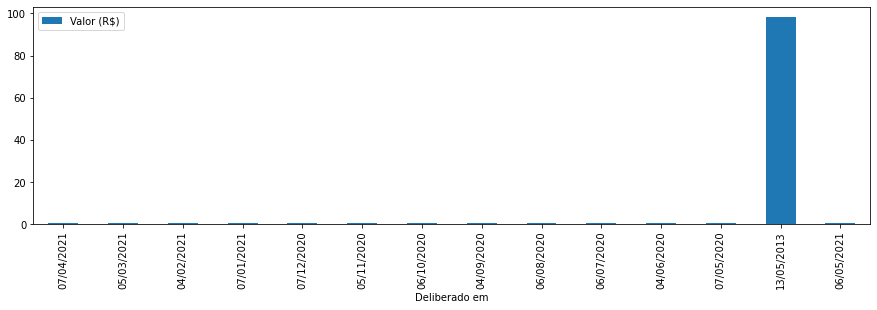

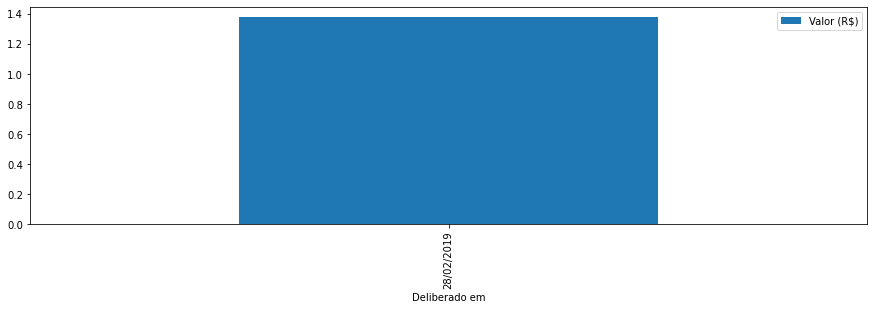

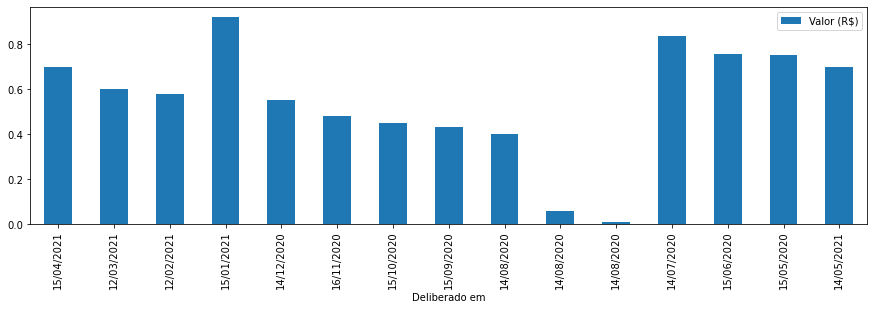

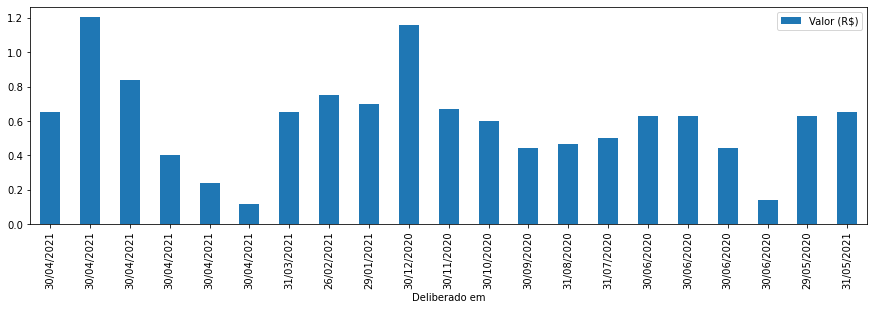

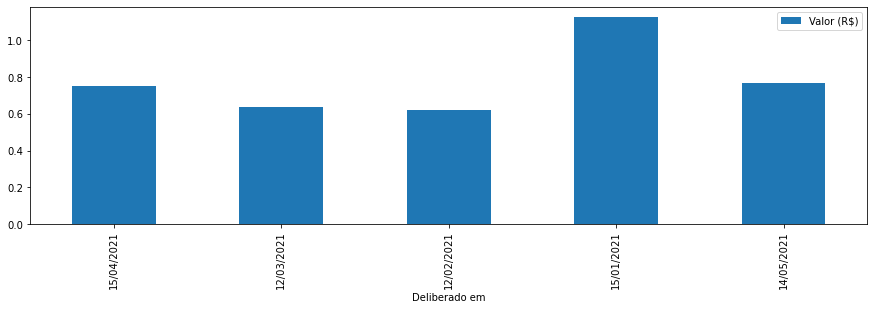

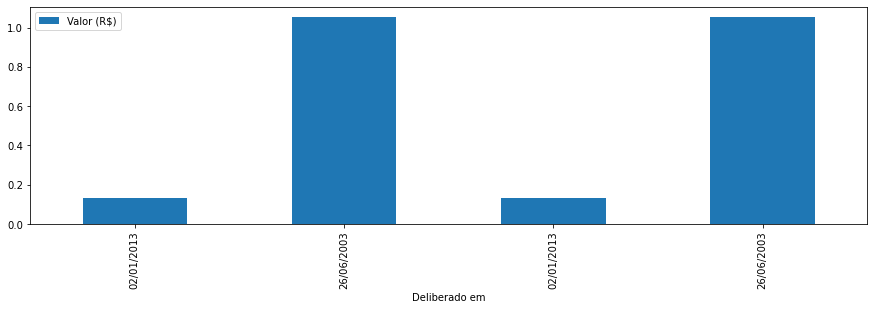

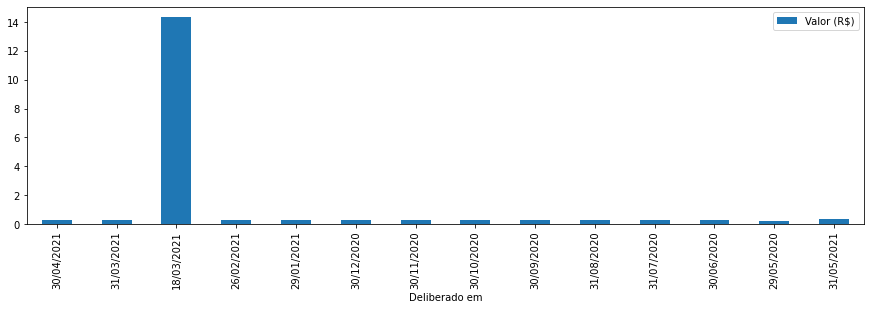

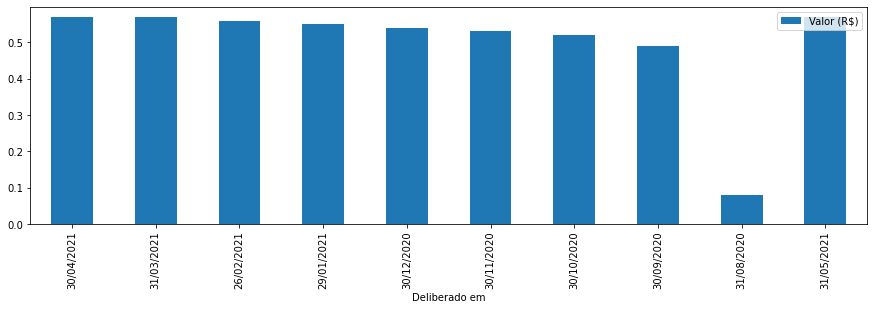

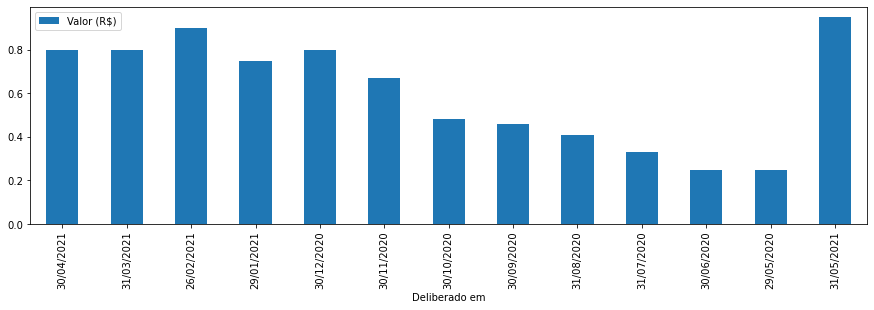

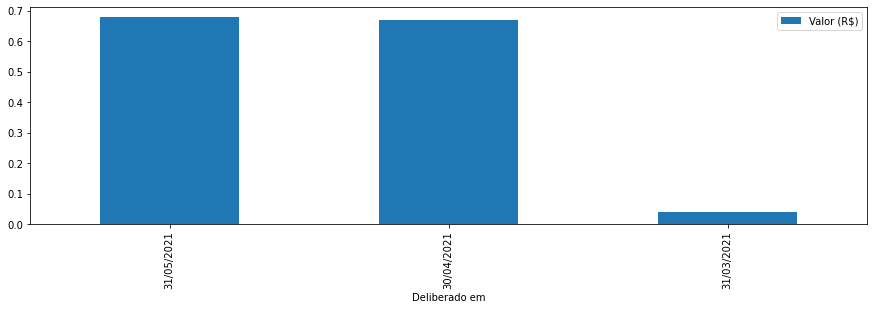

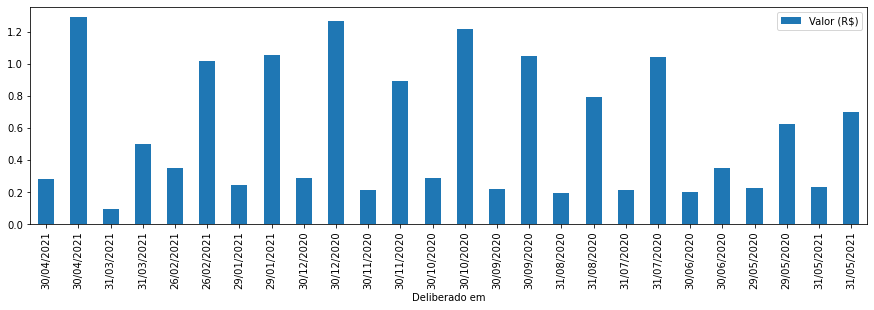

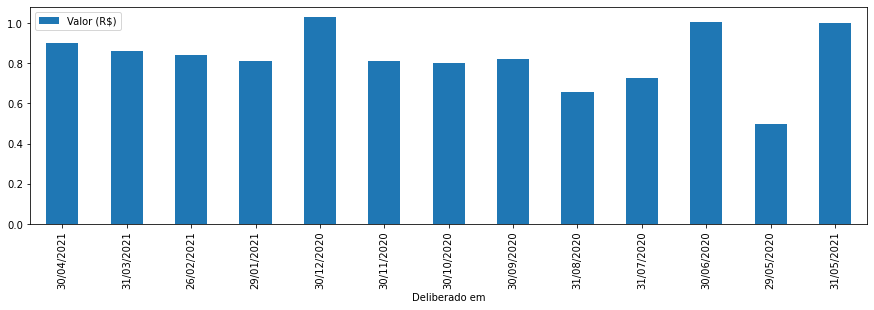

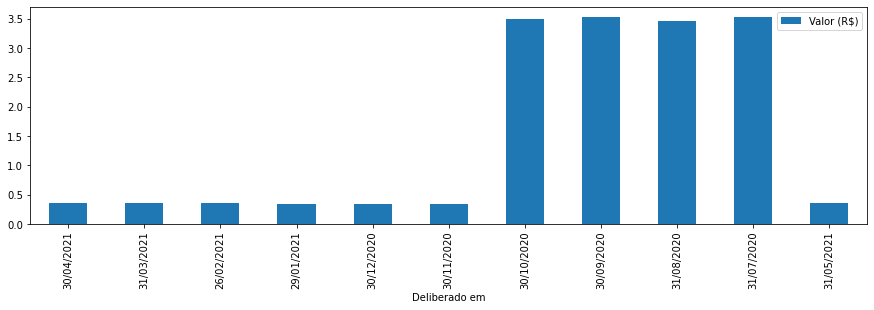

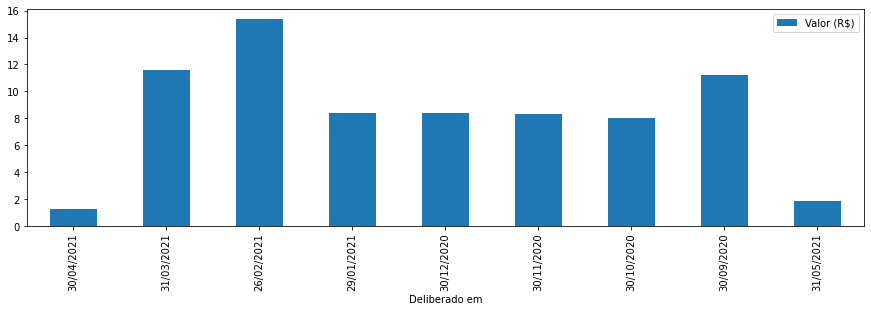

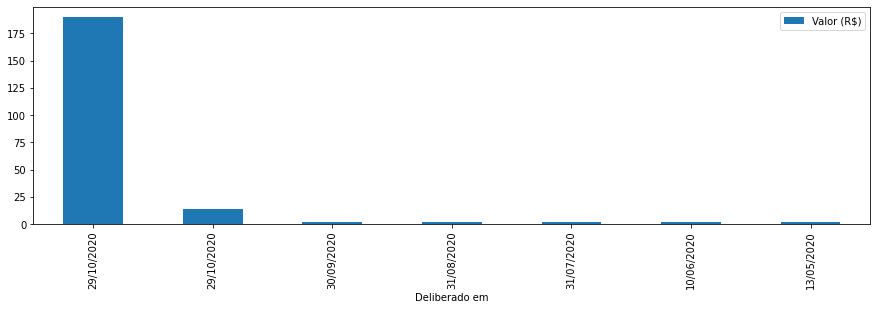

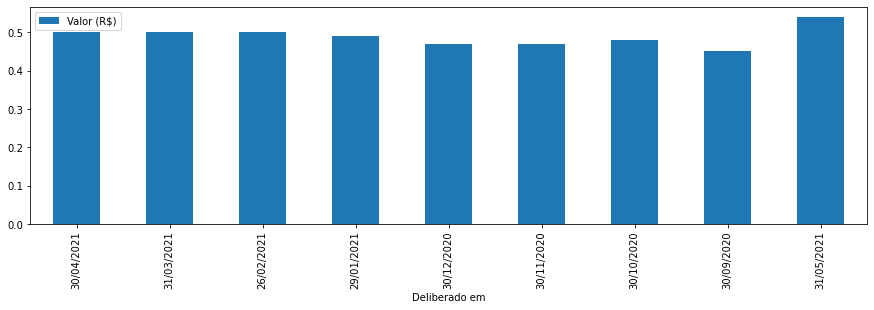

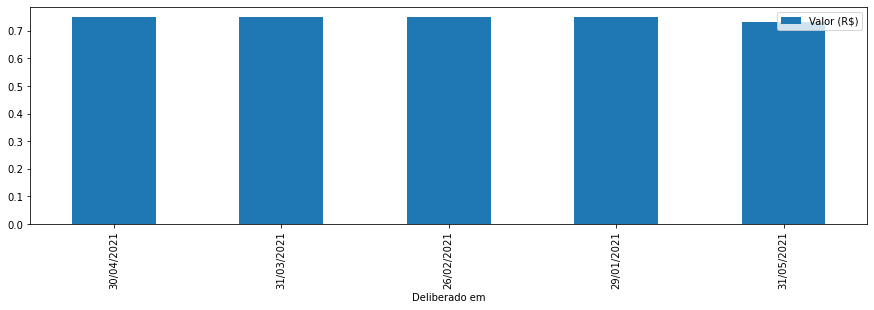

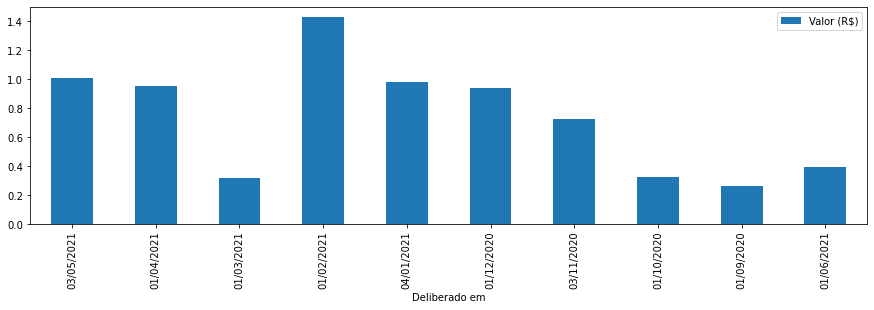

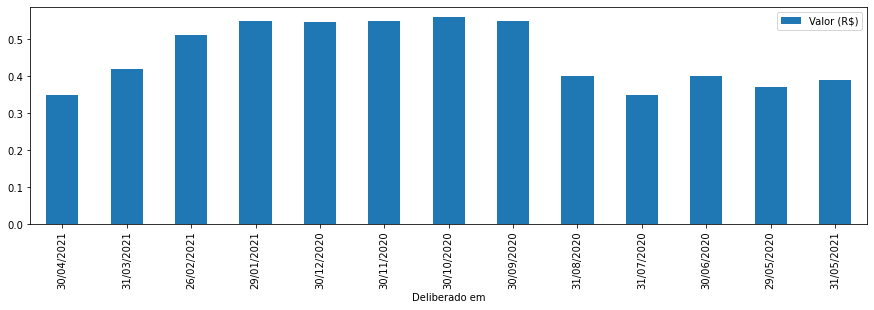

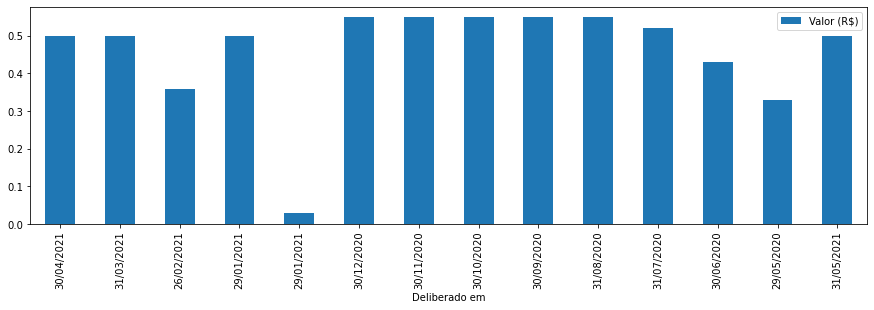

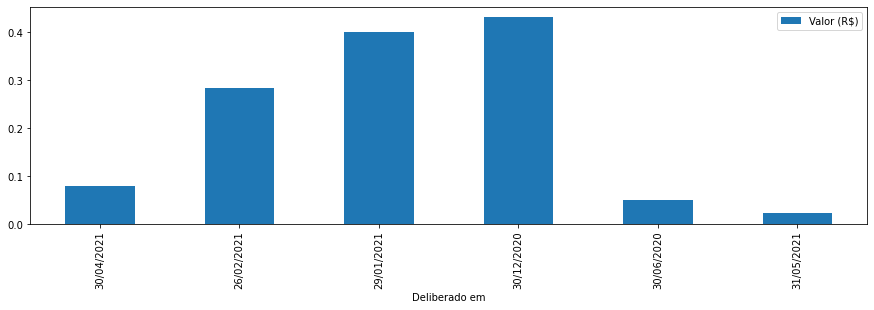

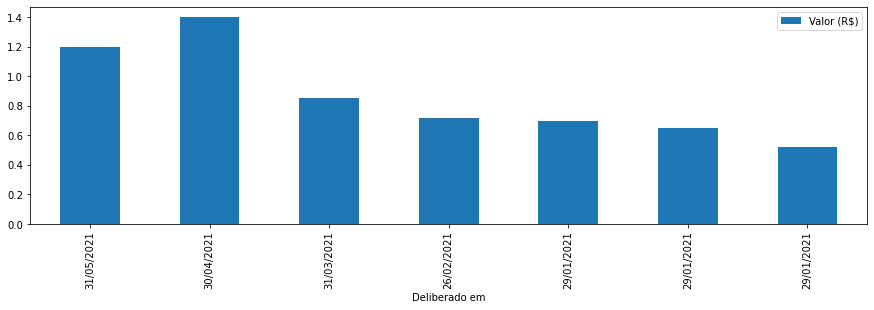

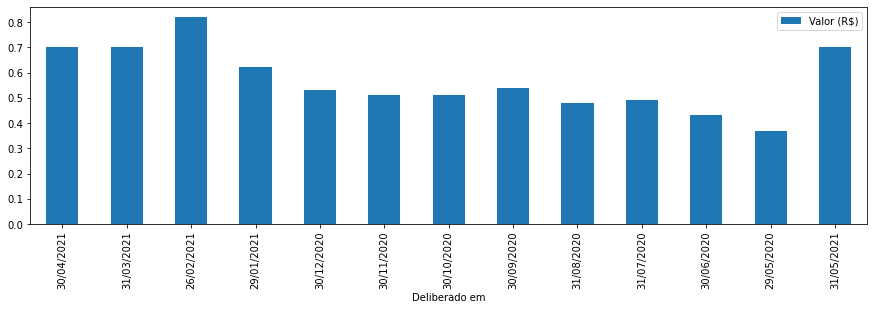

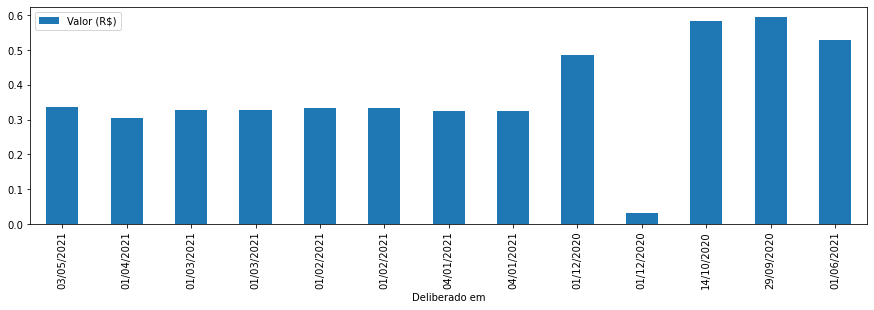

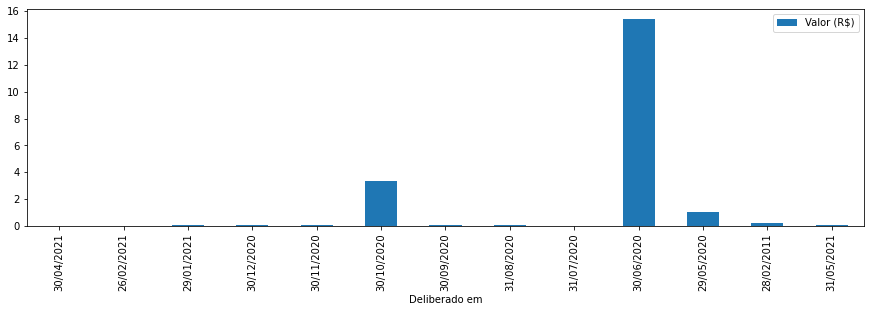

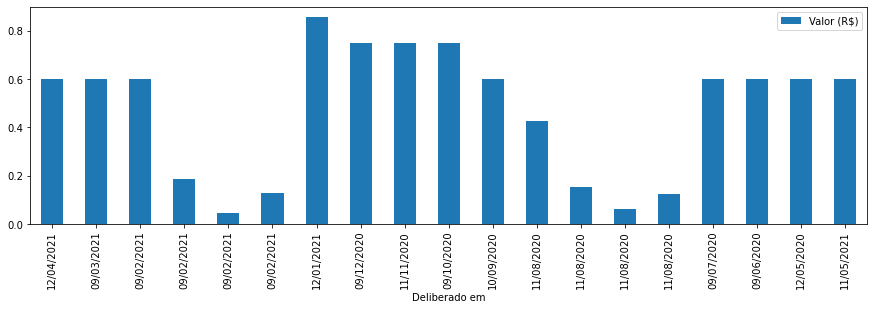

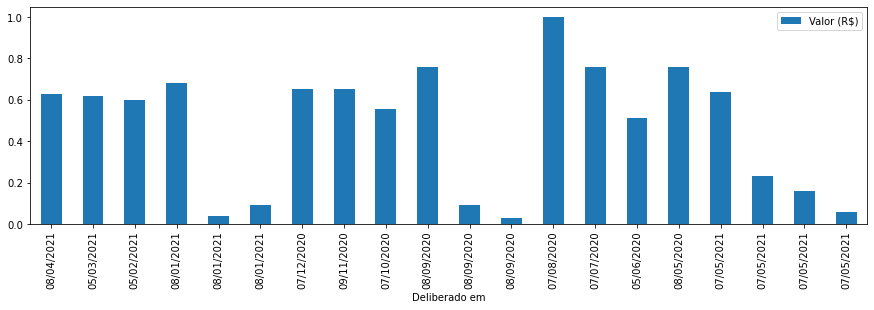

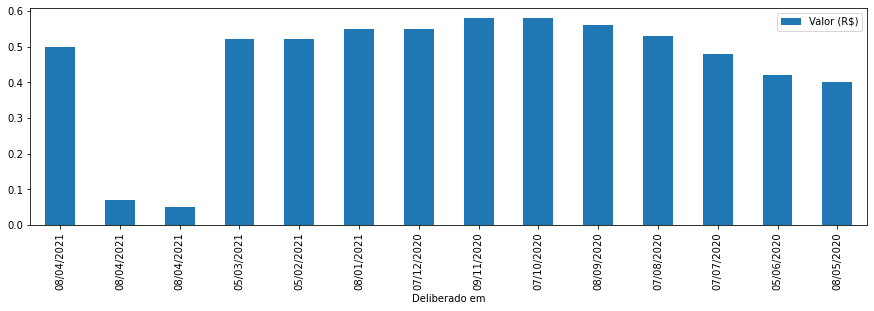

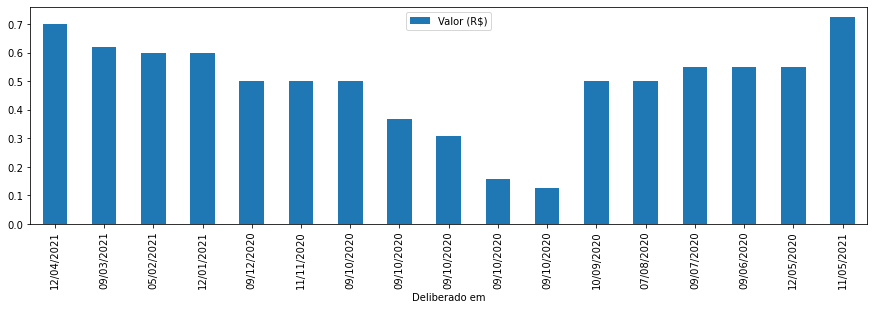

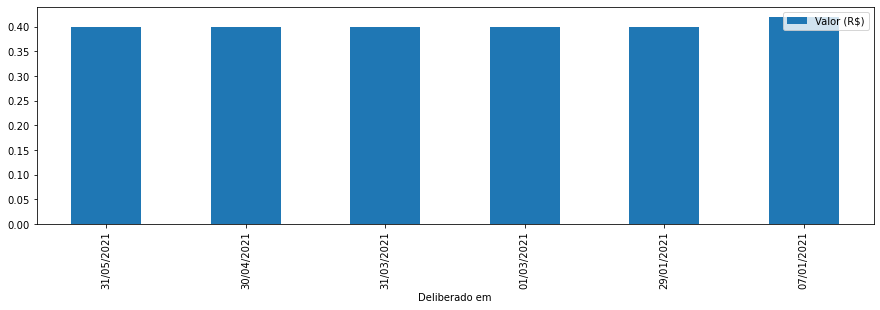

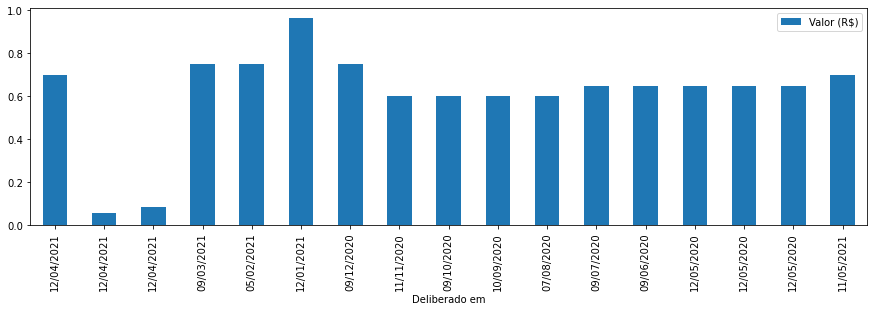

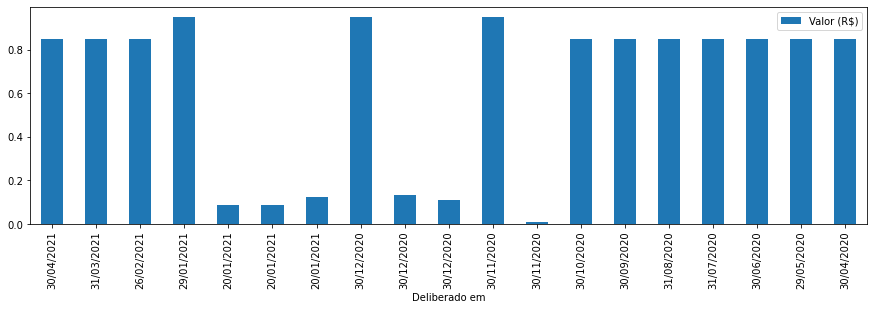

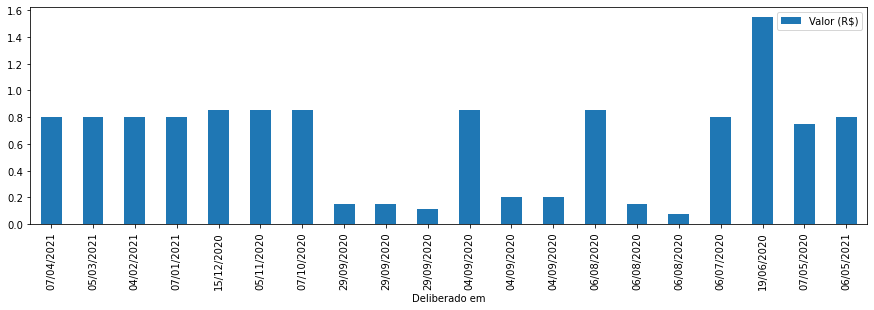

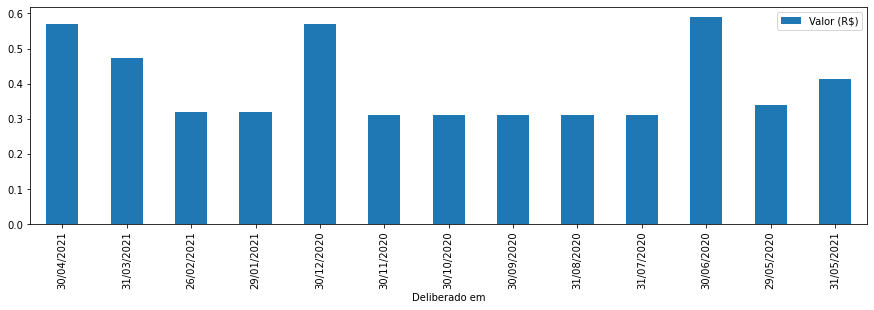

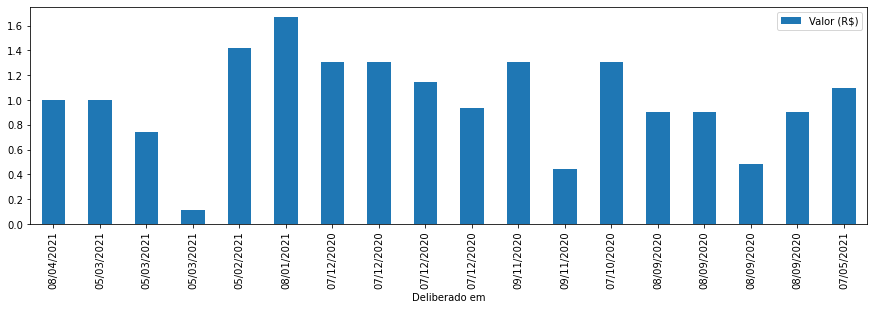

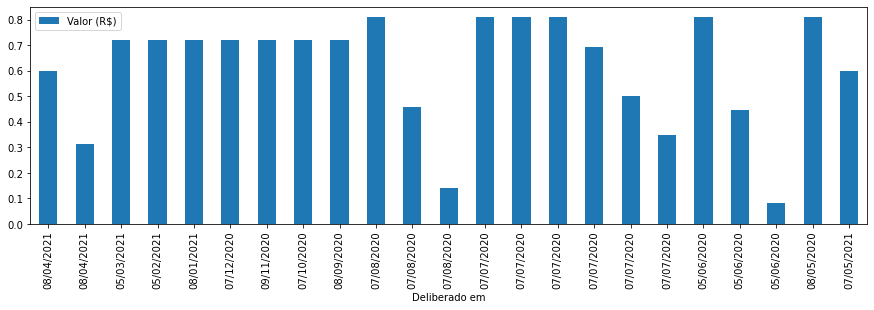

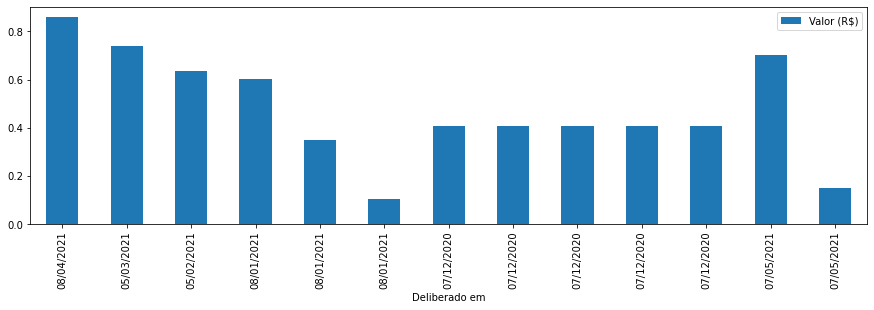

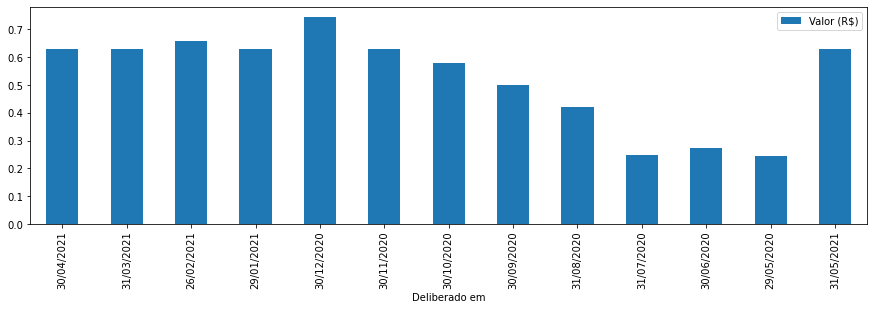

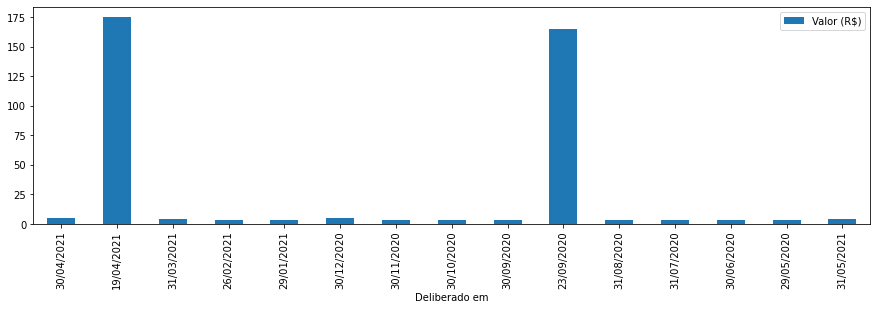

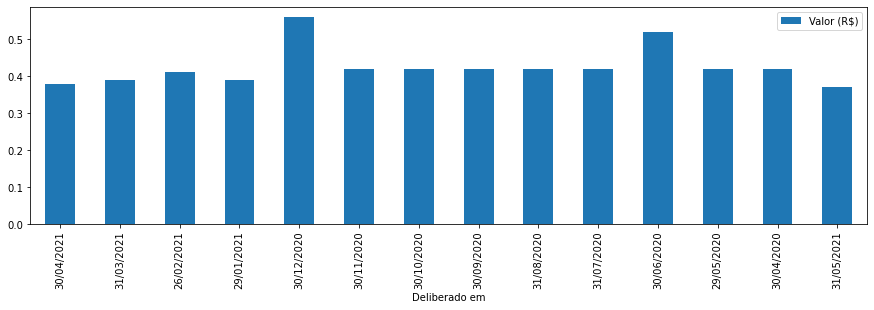

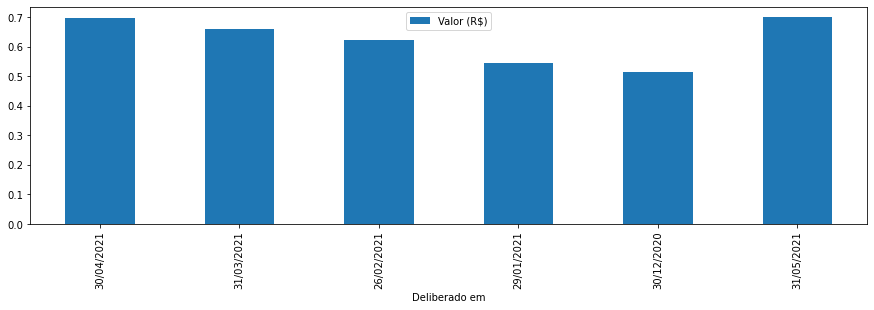

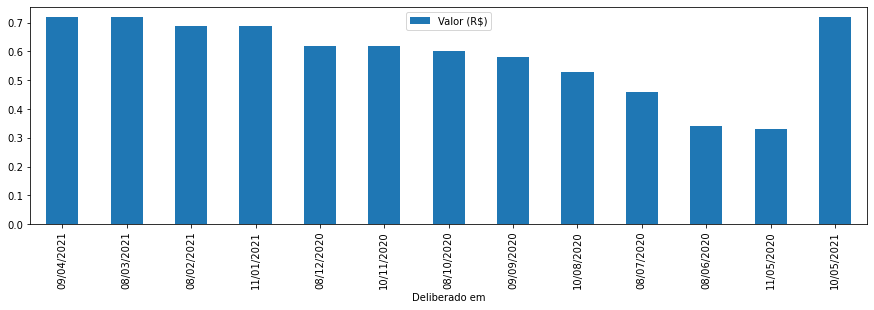

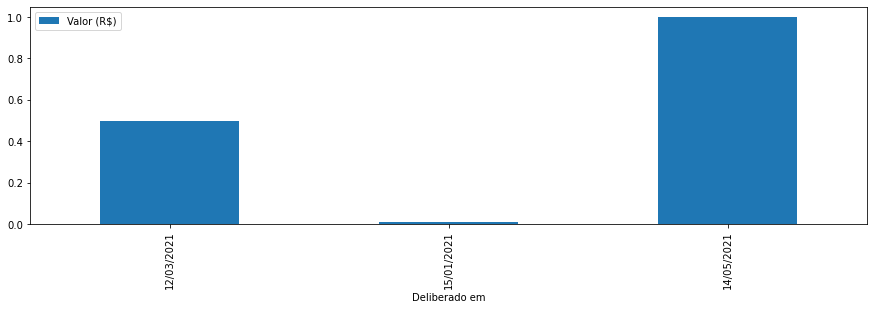

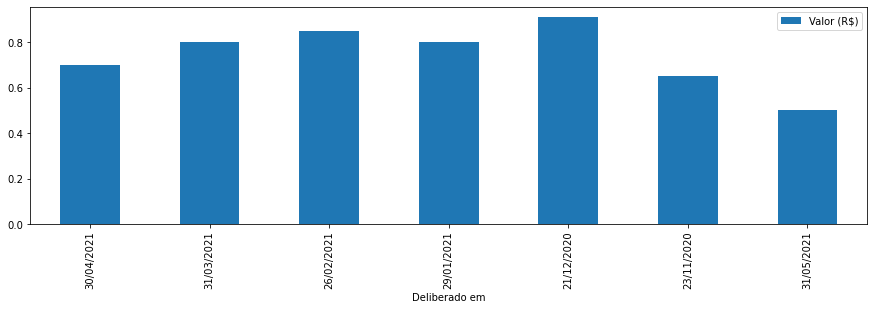

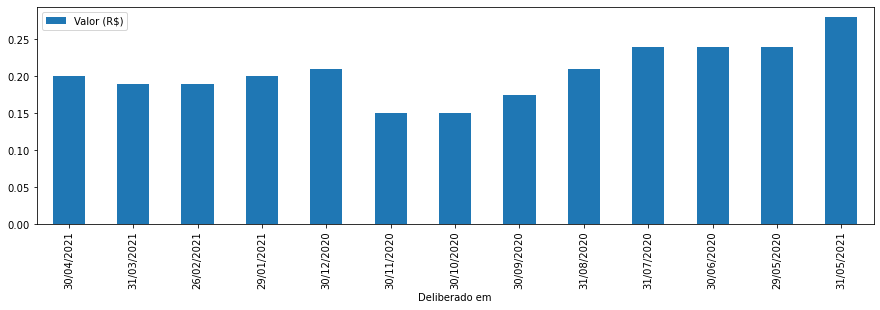

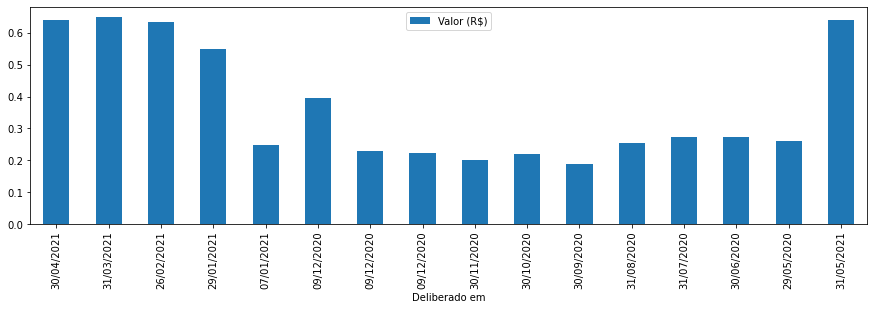

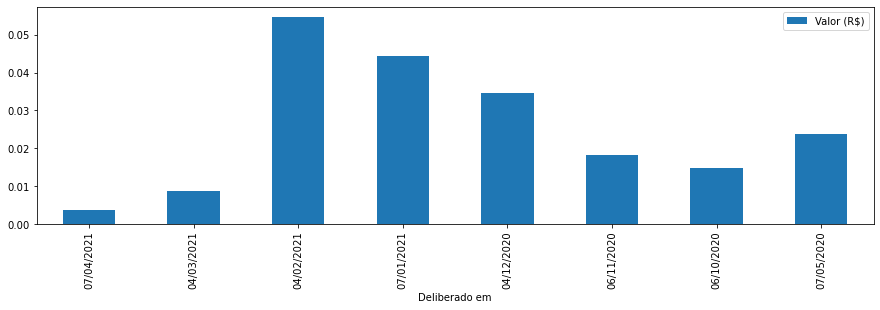

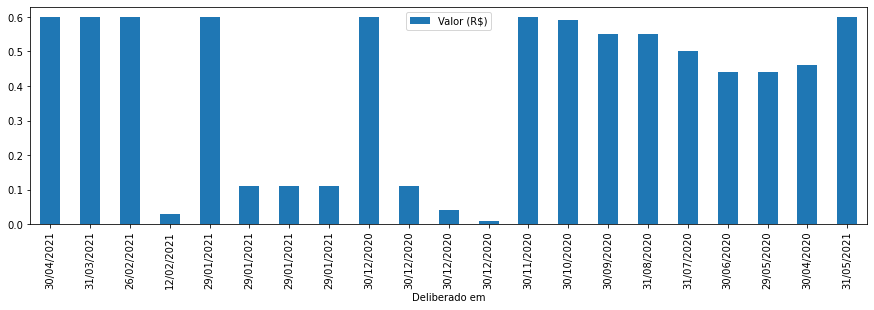

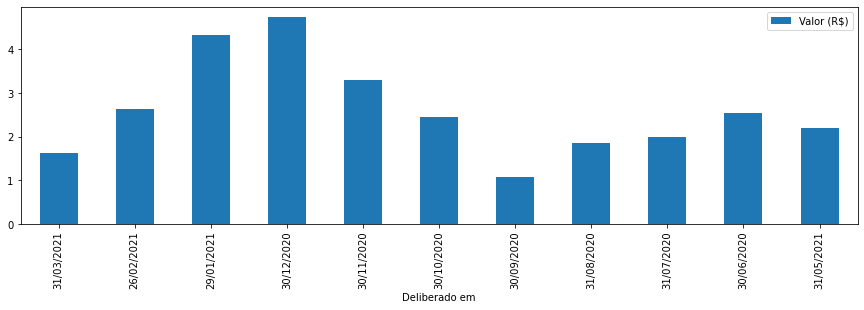

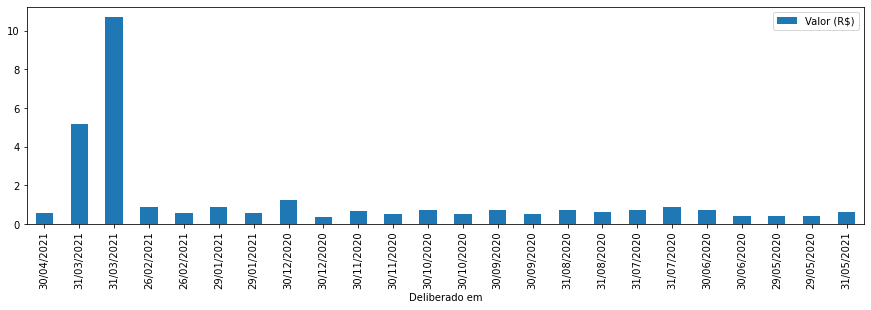

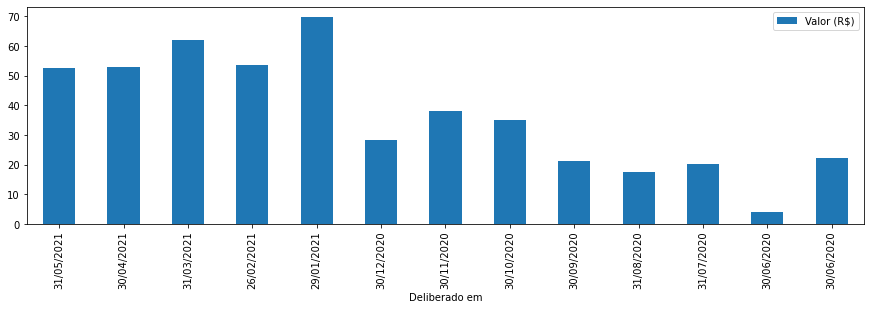

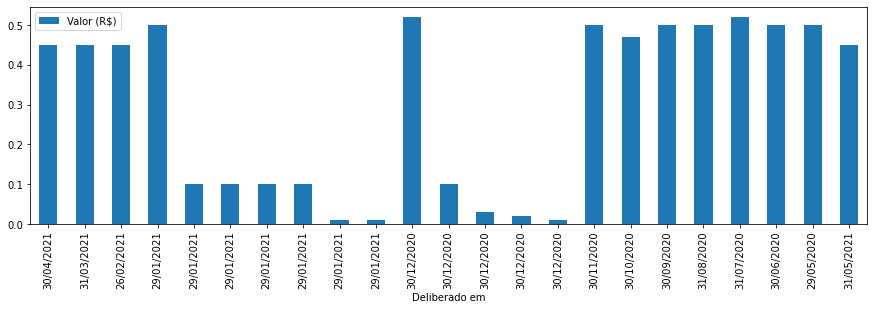

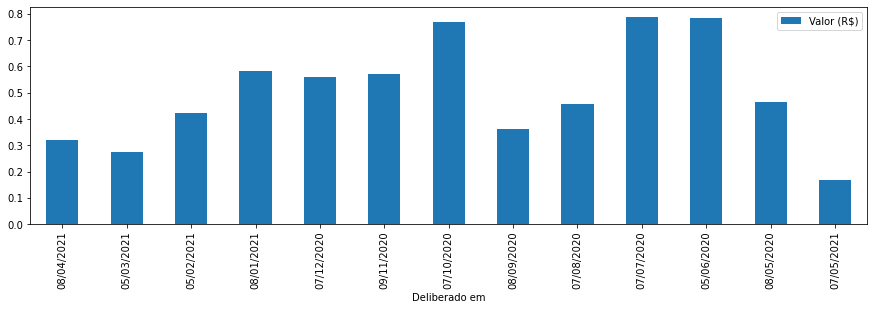

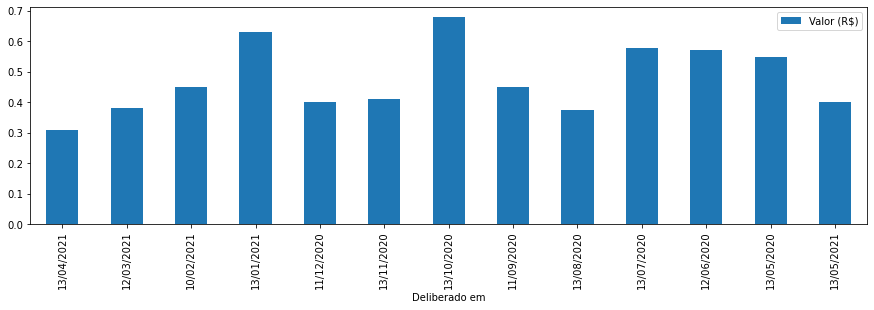

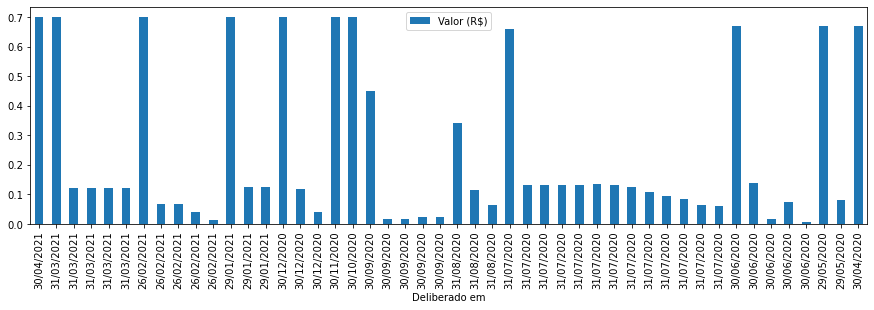

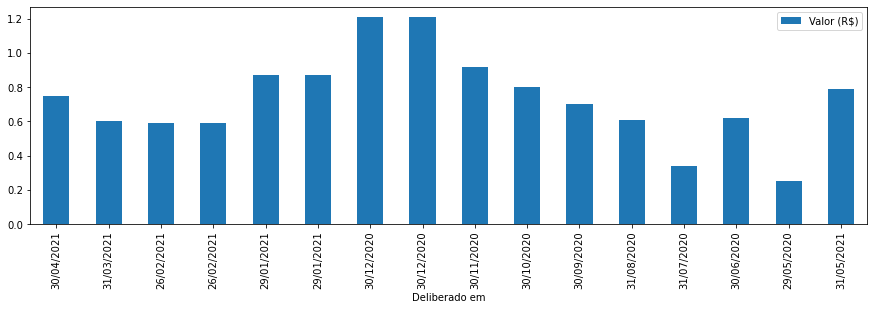

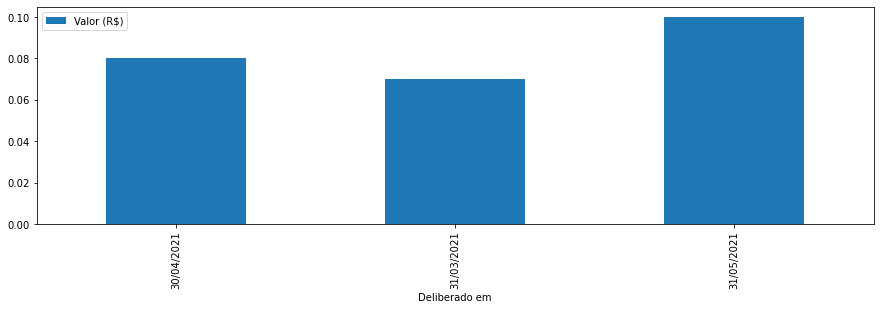

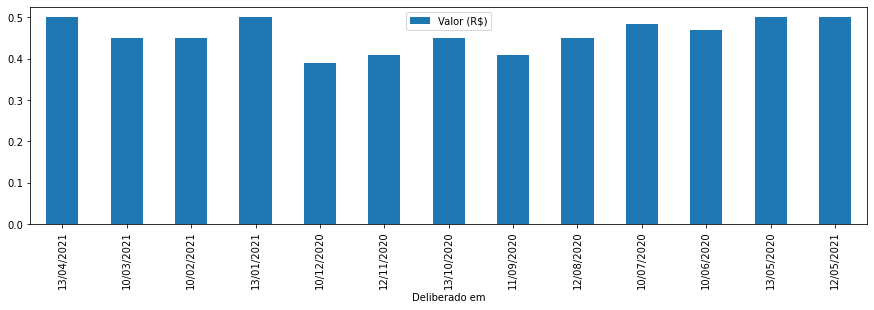

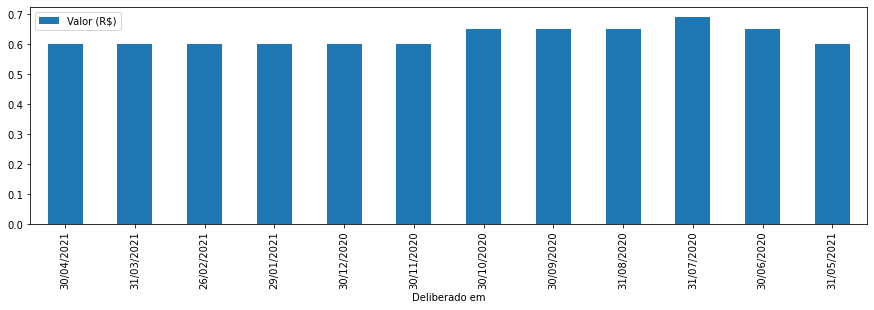

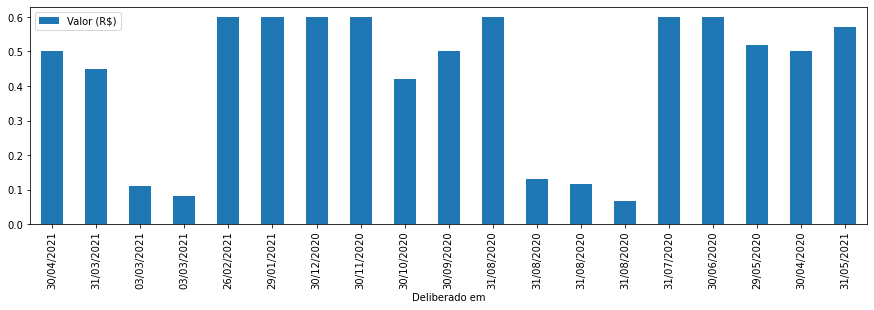

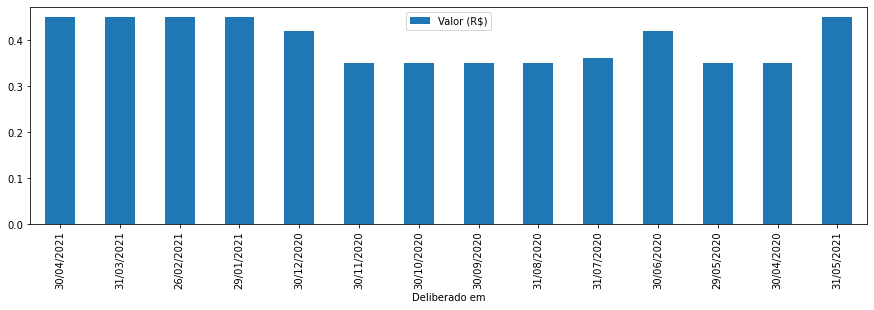

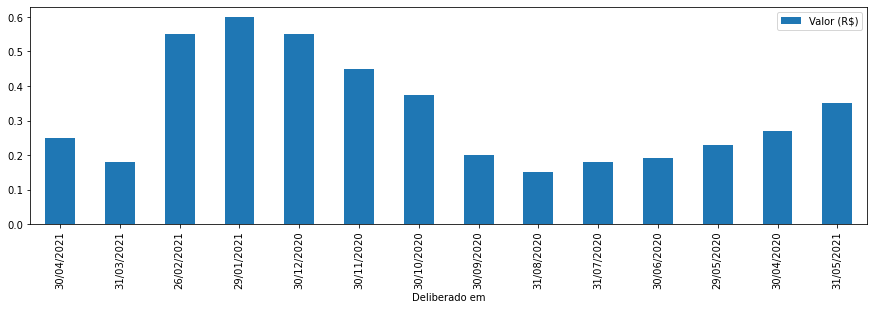

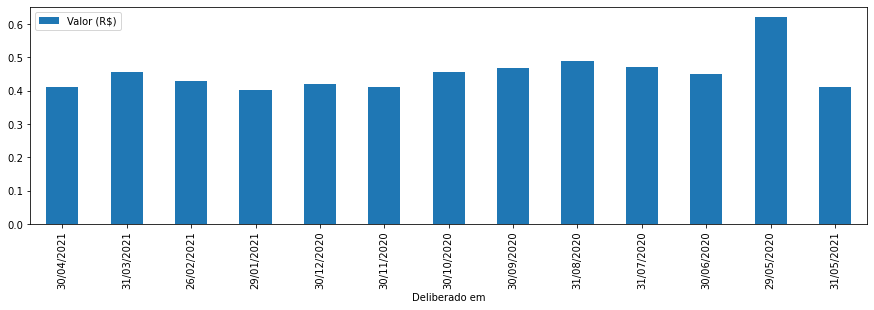

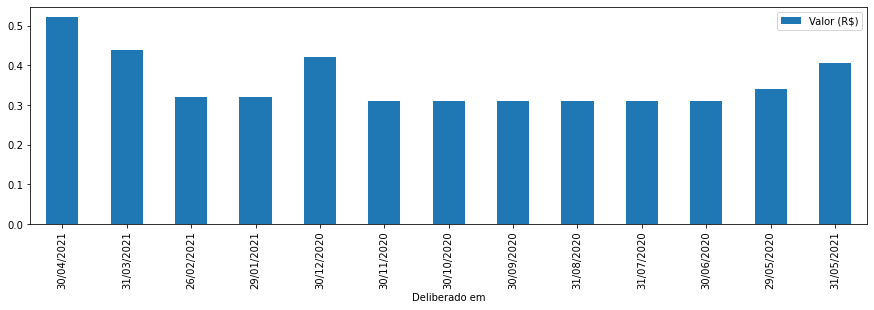

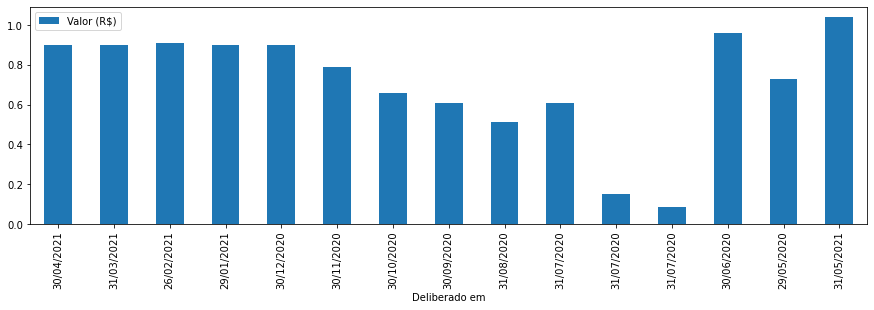

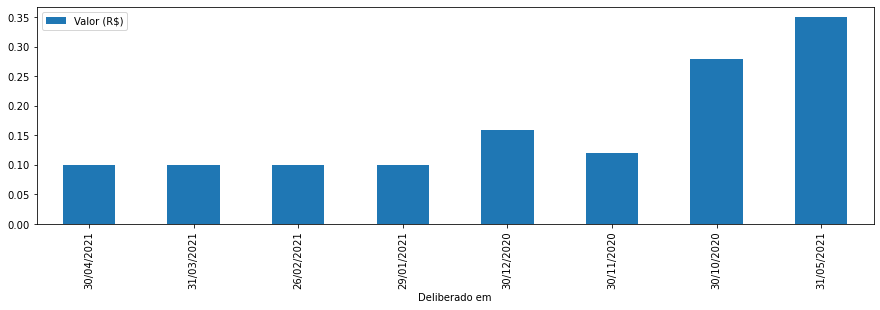

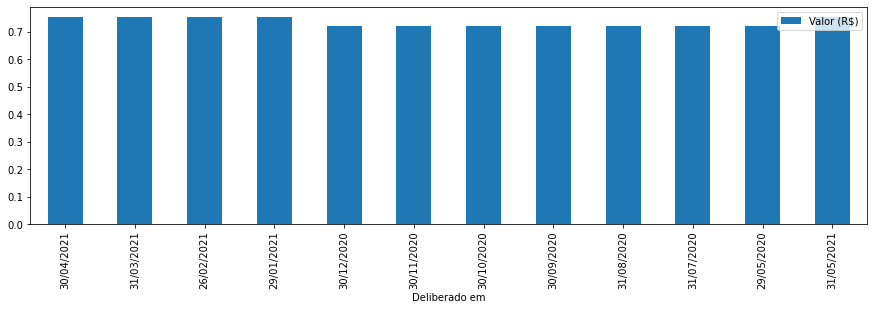

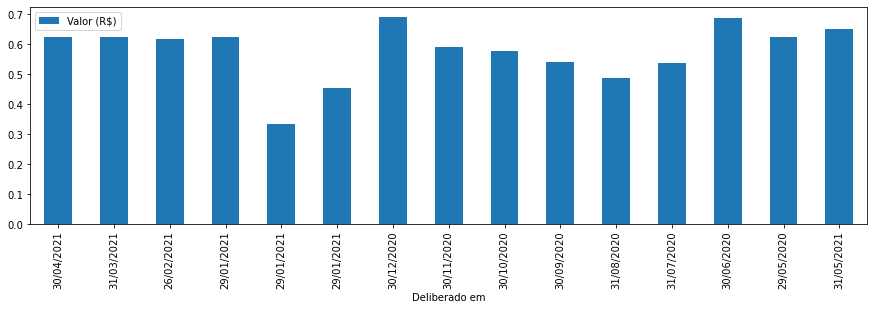

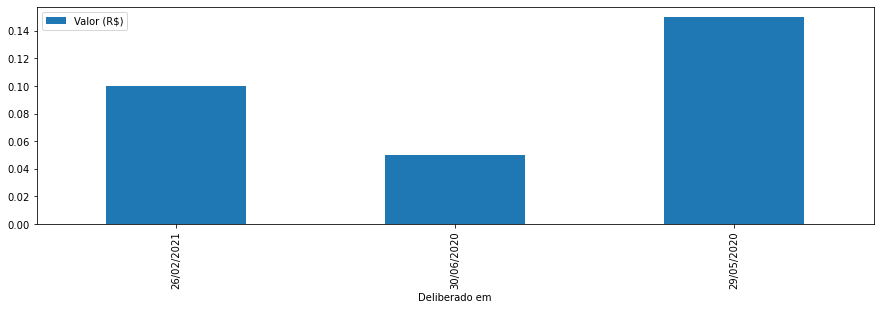

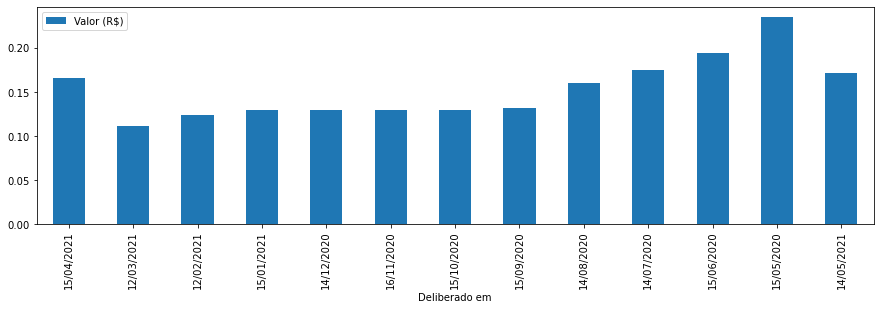

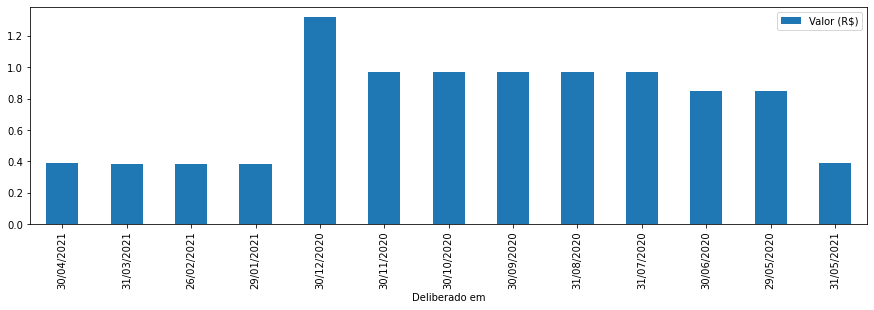

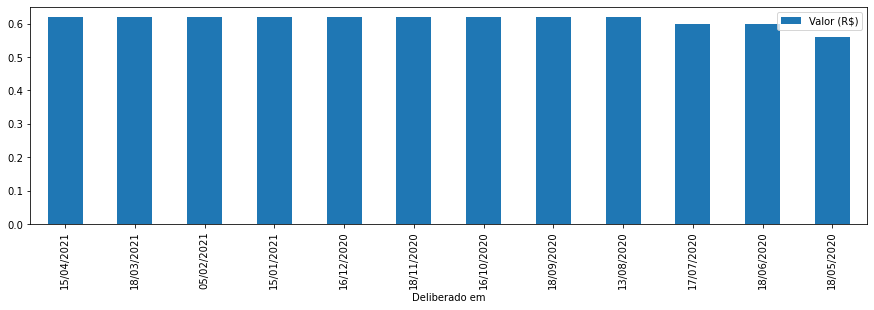

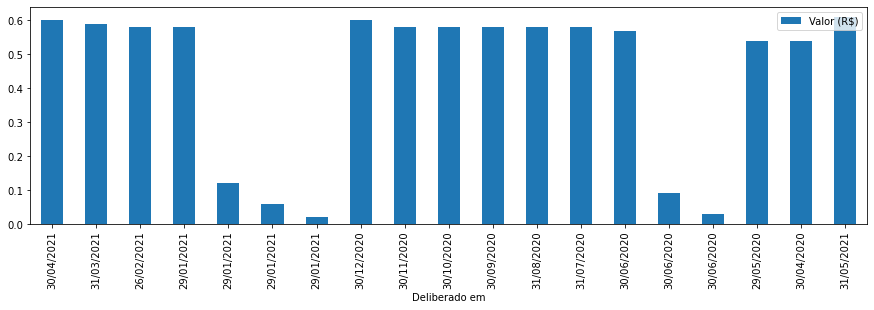

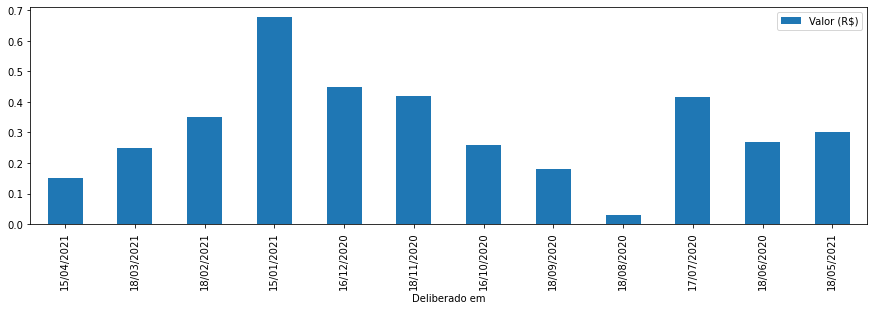

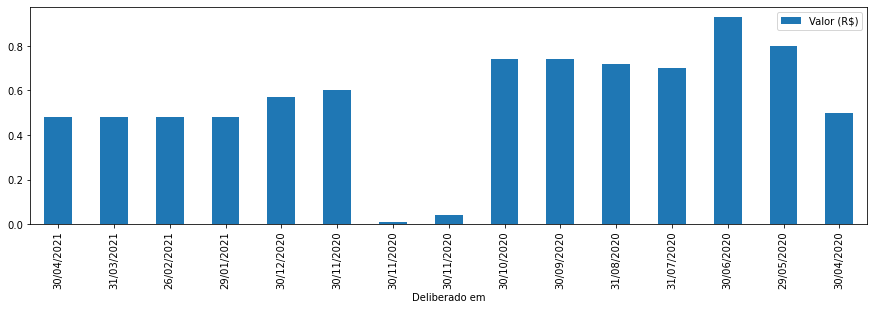

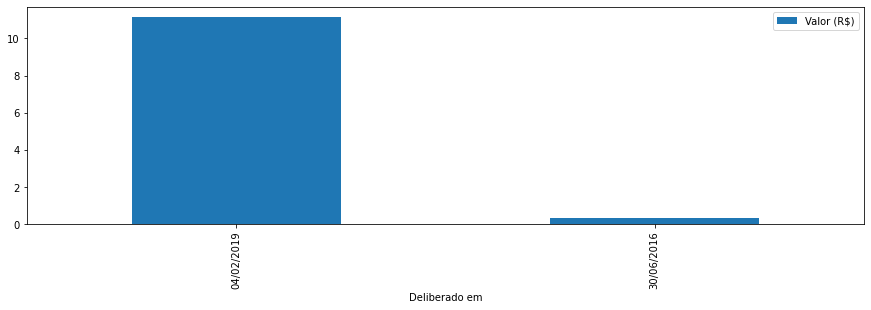

In [128]:
saida.groupby('ticker').plot(x="Deliberado em", y="Valor (R$)", figsize=(15,4), kind='bar');

In [98]:
df['dy_anual_absoluto'] = df.codigodo_fundo.apply(lambda x: saida[saida['ticker'] ==  x]['Valor (R$)'].sum())

### Preço justo segundo o modelo de Gordon
$$
\dfrac{VlrCota}{Min - Cresc}
$$

onde 
* $VlrCota$ - valor atual do FII.
* $Min$ - Retorno esperado.
* $Cresc$ - crescimento esperado do dividendo.

Considere que você tenha calculado as seguintes premissas para essa empresa: 

Expectativa de que a empresa pague R\$ 0,80 por ação em dividendos no próximo ano
* Retorno mínimo esperado para a ação de 15%
* Crescimento esperado dos dividendos de 1%
* O modelo de Gordon, neste exemplo, ficaria assim: Preço = 0,8 / (15% – 1%)

 
Descubra o preço justo da ação
Fazendo o cálculo do modelo de Gordon, chegaríamos ao seguinte valor:

$$
= 0,8 / (0,15-0,1) \\
= 0,8 / 0,14\\
= R\$ 5,71
$$

Descobrimos, portanto, que o preço justo para a ação dessa empresa é de R\$ 5,71.

Referência: https://www.youtube.com/watch?v=LjzozNDLcXI

In [100]:
ntnb45 = 0.0416
p_risco = 0.02

In [101]:
df['valor_justo'] = df['dy_anual_absoluto'] / (ntnb45+p_risco)

In [102]:
df.query("valor_justo > preco_atual").sort_values('valor_justo', ascending=False)[['codigodo_fundo', 'setor', 'preco_atual', 'valor_justo']]

,codigodo_fundo,setor,preco_atual,valor_justo
66,ERCR11,hibrido,85227.76,352081.092569
82,RNDP11,titulos_e_val__mob_,686.51,6277.858720
94,BBFI11B,lajes_corporativas,2586.98,5422.149302
13,PRSV11,lajes_corporativas,145.00,3475.811688
14,FAMB11B,lajes_corporativas,1153.05,2446.041040
...,...,...,...,...
138,HOSI11,hibrido,80.49,80.668669
104,CTXT11,lajes_corporativas,23.45,50.000000
5,PABY11,hibrido,12.43,38.530053
111,EDGA11,lajes_corporativas,26.67,29.787247


In [103]:
saida.groupby('ticker').count()

,Proventos,Código ISIN,Deliberado em,Negócios com até,Valor (R$),Relativo a,Início de Pagamento,Observações
ticker,,,,,,,,
ABCP11,10,10,10,10,10,10,10,0
AFCR11,15,15,15,15,15,15,15,0
AFOF11,2,2,2,2,2,2,2,0
AIEC11,8,8,8,8,8,8,8,0
ALMI11,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
XPIN11,12,12,12,12,12,12,12,0
XPLG11,19,19,19,19,19,19,19,0
XPML11,12,12,12,12,12,12,12,0


### Definindo requisitos para filtro
- 90% < P/VPA < 110%
- Quantidade de ativos > 5 para os setores de shoppings, lajes corporativas e logistica
- Vacância física < 10%
- Líquidez diária acima de 20k
- Dividend Yield acumulado acima de 5%
- Preço atual menor que o preço justo de Gordon

In [104]:
# dividend yield
df['justice'] = np.where(df['preco_atual'] < df['valor_justo'], True, False)
df['razonably_occupied'] = np.where((df['vacanciafisica'] < 0.15) | (df['vacanciafisica'].isnull()) | (df['vacanciafisica'].isnull()) , True, False)
papper_acceptable_conditions = (
    #df.acceptable_pricing &
    df.diverssified_assets &
    df.razonably_occupied &
    df.is_liquid &
    df.good_earnings &
    df.justice
)
df.loc[papper_acceptable_conditions].sort_values(by=['dy__12m_acumulado', 'liquidez_diaria'], ascending=False)

,codigodo_fundo,setor,preco_atual,liquidez_diaria,dividendo,dividendyield,dy__3m_acumulado,dy__6m_acumulado,dy__12m_acumulado,dy__3m_media,...,vacanciafinanceira,quantidadeativos,acceptable_pricing,diverssified_assets,razonably_occupied,is_liquid,good_earnings,dy_anual_absoluto,valor_justo,justice
234,RECR11,titulos_e_val__mob_,103.69,68180.0,1.20,0.0116,0.0308,0.0669,0.1278,0.0103,...,NaN,0,True,True,True,True,True,17.993500,292.102273,True
41,CVBI11,titulos_e_val__mob_,104.81,47145.0,1.00,0.0094,0.0287,0.0732,0.1171,0.0096,...,NaN,0,True,True,True,True,True,12.509308,203.073174,True
162,BCRI11,titulos_e_val__mob_,112.00,37315.0,1.59,0.0138,0.0365,0.0627,0.1116,0.0122,...,NaN,0,True,True,True,True,True,15.261739,247.755505,True
43,IRDM11,titulos_e_val__mob_,131.66,52800.0,1.16,0.0082,0.0262,0.0574,0.1065,0.0087,...,NaN,0,False,True,True,True,True,17.269371,280.346930,True
37,CPTS11,titulos_e_val__mob_,100.79,90795.0,1.05,0.0104,0.0307,0.0615,0.1064,0.0102,...,NaN,0,True,True,True,True,True,13.086558,212.444121,True
88,KNIP11,titulos_e_val__mob_,109.00,111282.0,1.13,0.0103,0.0280,0.0611,0.1012,0.0093,...,NaN,0,True,True,True,True,True,16.020000,260.064935,True
122,VRTA11,titulos_e_val__mob_,112.11,28399.0,1.04,0.0093,0.0249,0.0482,0.0866,0.0083,...,NaN,0,False,True,True,True,True,10.656140,172.989282,True
119,VCJR11,titulos_e_val__mob_,99.57,22827.0,0.79,0.0077,0.0208,0.0460,0.0853,0.0069,...,NaN,0,True,True,True,True,True,11.720000,190.259740,True
102,MXRF11,hibrido,10.43,636366.0,0.07,0.0066,0.0218,0.0434,0.0806,0.0073,...,NaN,0,True,True,True,True,True,1.650000,26.785714,True
157,VINO11,lajes_corporativas,60.26,26716.0,0.45,0.0075,0.0221,0.0431,0.0799,0.0074,...,NaN,9,True,True,True,True,True,5.550000,90.097403,True
